# Atividade extra

**Dados do aluno**
* Aluno: Jâncy Wdson Coriolano de Aragão
* Matrícula: 	20180063470

**Perguntas**
* Como está a questão da diferença de gêneros nos cursos de graduação e pós-graduação da UFRN ao longo dos anos?
* E em relação a etnia/raça?

**Descrição**
* Faça um estudo comparativo considerando pelo menos 5 cursos de graduação (+BTI, +BCT) de cada centro (https://www.ufrn.br/institucional/unidades-institucionais) e para os programas de pós graduação PPgEEC, PPgSC, PPgSW, PPgITE, PPgBIOINF.
* Compartilhe o notebook final no github (envie o link do repositório) escrevendo suas conclusões e comparando os resultados das áreas com os dados gerais da UFRN.
* Trabalho pode ser feito em dupla e irá valer 3,00 (três) pontos extras na segunda avaliação.

## Configurações iniciais

### 1. Importação das bibliotecas

In [0]:
# Importação das bibliotecas a serem utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Leitura dos CSVs com informações dos discentes de 2009 a 2019

In [0]:
# Leitura dos CSVs
nove = pd.read_csv("discentes-2009.csv", sep=";")
dez = pd.read_csv("discentes-2010.csv", sep=";")
onze = pd.read_csv("discentes-2011.csv", sep=";")
doze = pd.read_csv("discentes-2012.csv", sep=";")
treze = pd.read_csv("discentes-2013.csv", sep=";")
quatorze = pd.read_csv("discentes-2014.csv", sep=";")
quinze = pd.read_csv("discentes-2015.csv", sep=";")
dezesseis = pd.read_csv("discentes-2016.csv", sep=";")
dezessete = pd.read_csv("discentes-2017.csv", sep=";")
dezoito = pd.read_csv("discentes-2018.csv", sep=";")
dezenove = pd.read_csv("discentes-2019.csv", sep=";")

### 3. Concatenação e eliminação de linhas nulas dos CSVs lidos anteriormente

In [0]:
# União de todos os csvs lidos anteriormente
geral = pd.concat([nove, dez, onze, doze, treze, quatorze, quinze, dezesseis, dezessete, dezoito, dezenove])

# Eliminação de linhas nulas
geral = geral.dropna()

## Configuração para a análise dos discentes de Graduação

In [0]:
# Seleção alunos da graduação
geral_graduacao = geral.loc[geral['nivel_ensino'] == 'GRADUAÇÃO']

# Seleção dos cursos a serem explorados
lista_cursos = ['BIOMEDICINA', 'CIÊNCIAS BIOLÓGICAS', 'ECOLOGIA', 'AQUICULTURA', 'ENGENHARIA DE AQUICULTURA', 'EDUCAÇÃO FÍSICA', 'FARMÁCIA', 'MEDICINA', 'ODONTOLOGIA', 'ENFERMAGEM', 'CIÊNCIA DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE', 'QUÍMICA', 'MATEMÁTICA', 'GEOLOGIA', 'DESIGN', 'PSICOLOGIA', 'TEATRO', 'HISTÓRIA', 'DANÇA', 'CIÊNCIAS CONTÁBEIS', 'SERVIÇO SOCIAL', 'ADMINISTRAÇÃO', 'DIREITO', 'CIÊNCIAS ECONÔMICAS', 'PEDAGOGIA', 'ARQUITETURA E URBANISMO', 'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA', 'ENGENHARIA CIVIL', 'TECNOLOGIA DA INFORMAÇÃO', 'CIÊNCIAS E TECNOLOGIA']

# Seleção dos cursos no dataset
graduacao = geral_graduacao.loc[geral_graduacao['nome_curso'].isin(lista_cursos)]

# Padronização do nome do curso "Aquicultura" e "Engenharia de Aquicultura"
graduacao['nome_curso'] = graduacao['nome_curso'].replace({'AQUICULTURA':'ENGENHARIA DE AQUICULTURA'})

# Remoção do curso AQUICULTURA, após ser integrado ao curso ENGENHARIA DE AQUICULTURA
lista_cursos.remove('AQUICULTURA')

# Remoção de linhas que não possui sexo informado
graduacao_sexo = graduacao.loc[graduacao['sexo'] != 'N']

# Remoção de linhas que não possui raça informada
graduacao_raca = graduacao.loc[graduacao['raca'] != 'Não Informado']

Como descrito no comando da atividade, deveriam ser selecionados 5 cursos de cada centro da UFRN. O Centro de Biociências - CB possui apenas 4 cursos, então todos foram selecionados, assim como no Centro de Educação - CE, que possui apenas 1 curso de Graduação no qual foi selecionado. Abaixo a lista de cursos selecionados de acordo com os centros:

**Centro de Biociências - CB**
* Biomedicina
* Ciências Biológicas
* Ecologia
* Aquicultura / Engenharia de Aquicultura
---
**Centro de Ciências da Saúde - CCS**
* Educação Física
* Farmácia
* Medicina
* Odontologia
* Enfermagem
---
**Centro de Ciências Exatas e da Terra - CCET**
* Ciência da Computação
* Engenharia de Software
* Química
* Matemática
* Geologia
---
**Centro de Ciências Humanas, Letras e Artes - CCHLA**
* Design
* Psicologia
* Teatro
* História
* Dança
---
**Centro de Ciências Sociais Aplicadas - CCSA**
* Ciências Contábeis
* Serviço Social
* Administração
* Direito
* Ciências Econômicas
---
**Centro de Educação - CE**
* Pedagogia
---
**Centro de Tecnologia - CT**
* Arquitetura e Urbanismo
* Engenharia de Computação
* Engenharia de Produção
* Engenharia Mecânica
* Engenharia Civil
---
**Instituto Metrópole Digital - IMD**
* Tecnologia da Informação
---
**Escola de Ciência e Tecnologia - ECT**
* Ciências e Tecnologia

#### 1. Análise da diferença de gêneros nos cursos de Graduação da UFRN

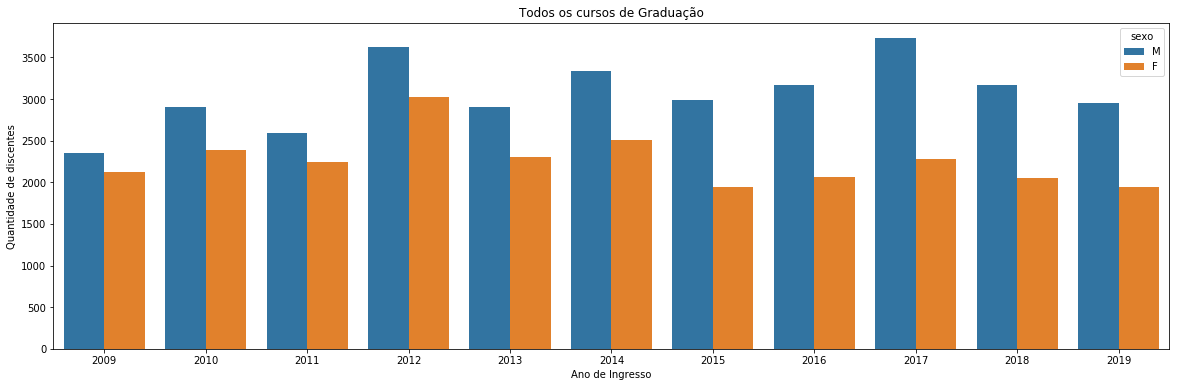

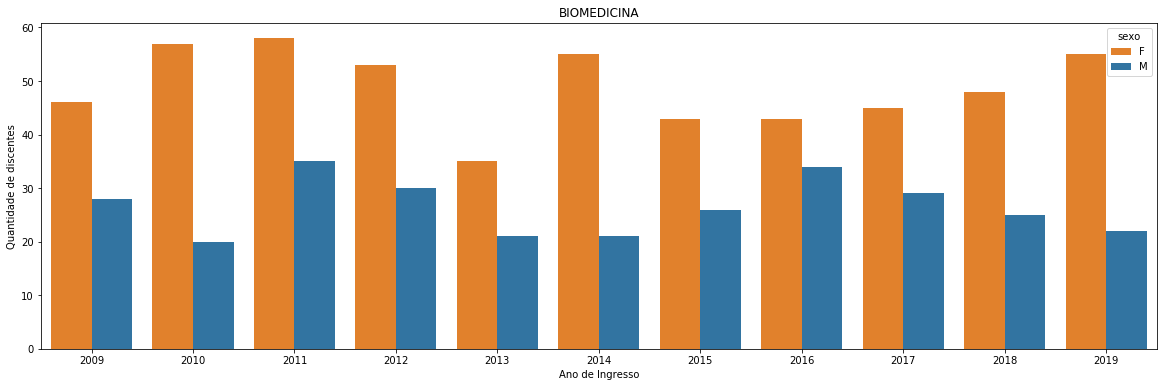

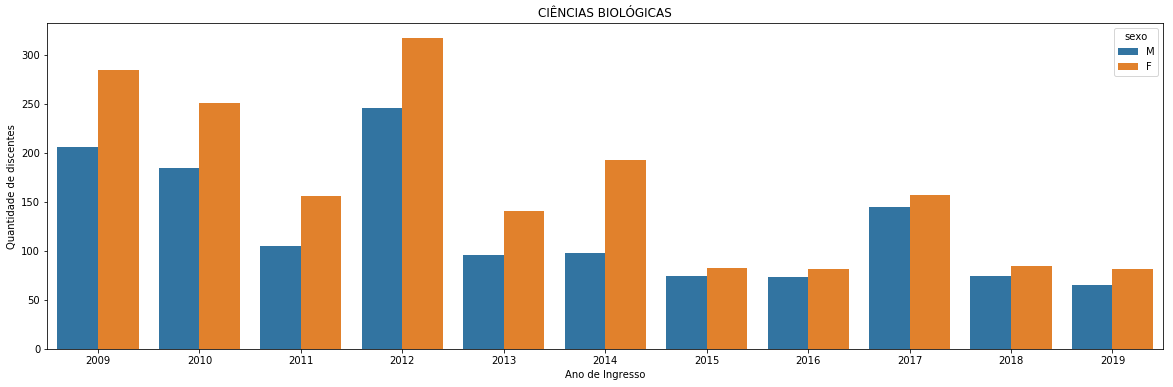

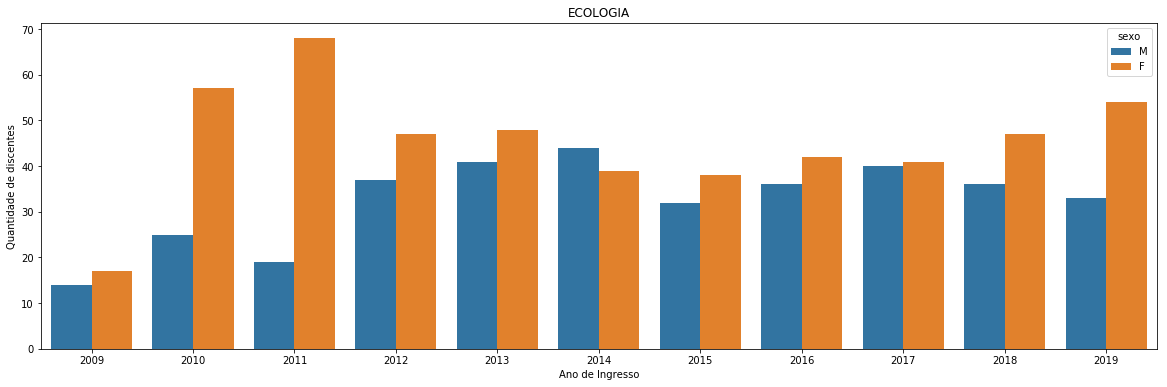

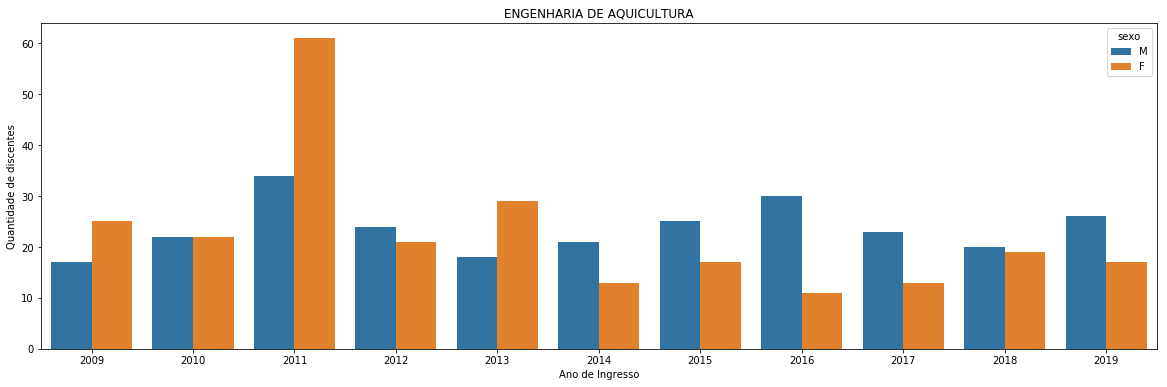

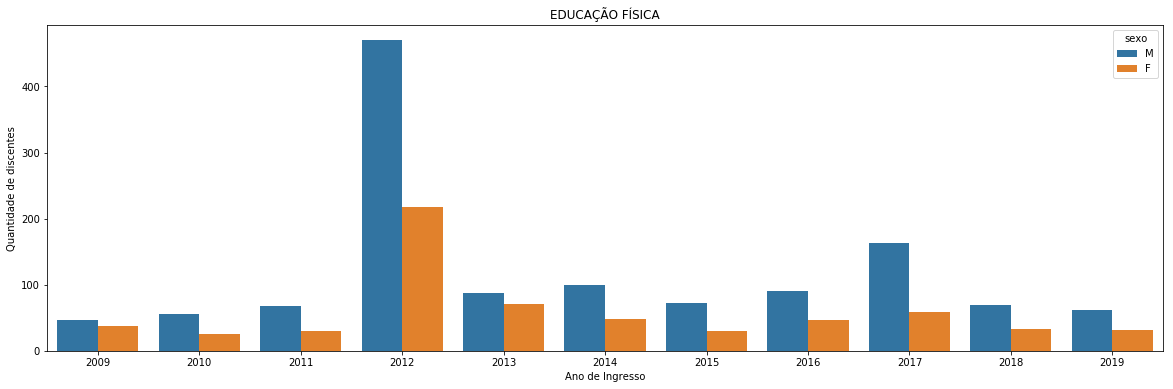

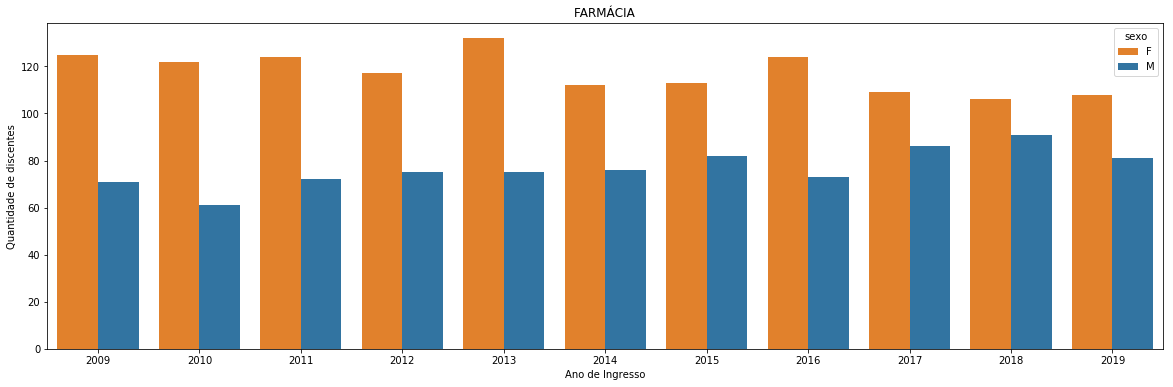

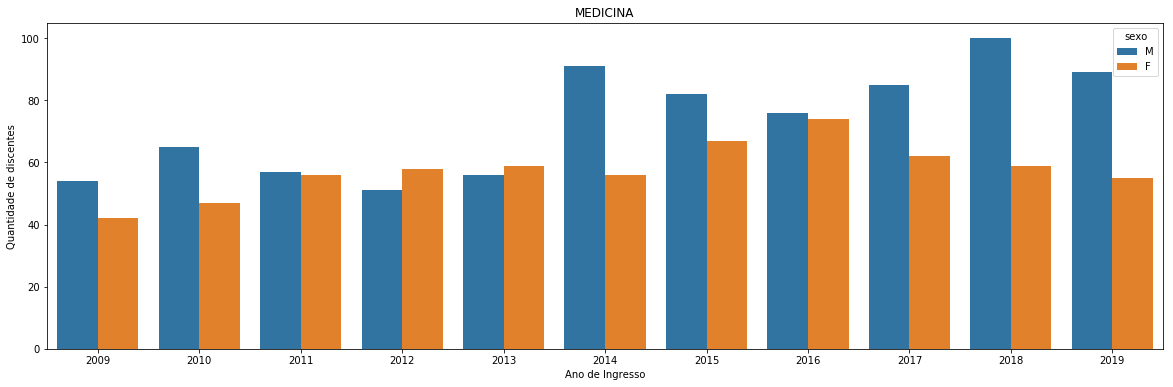

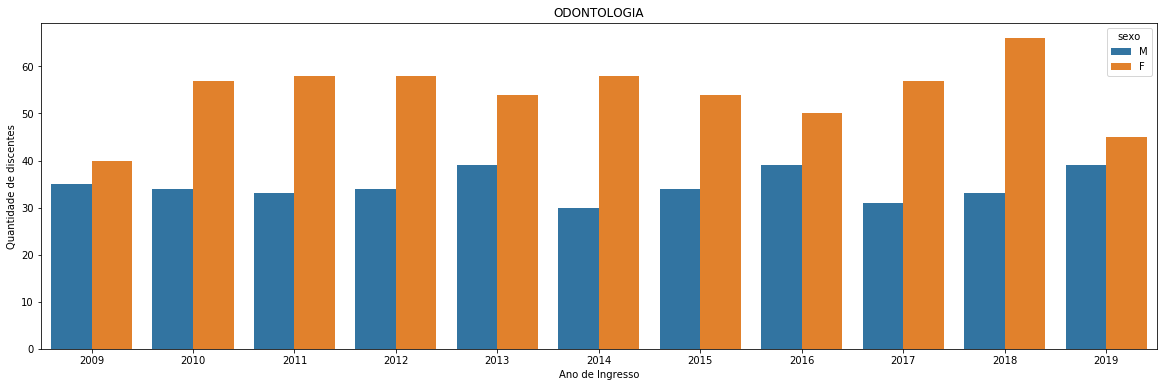

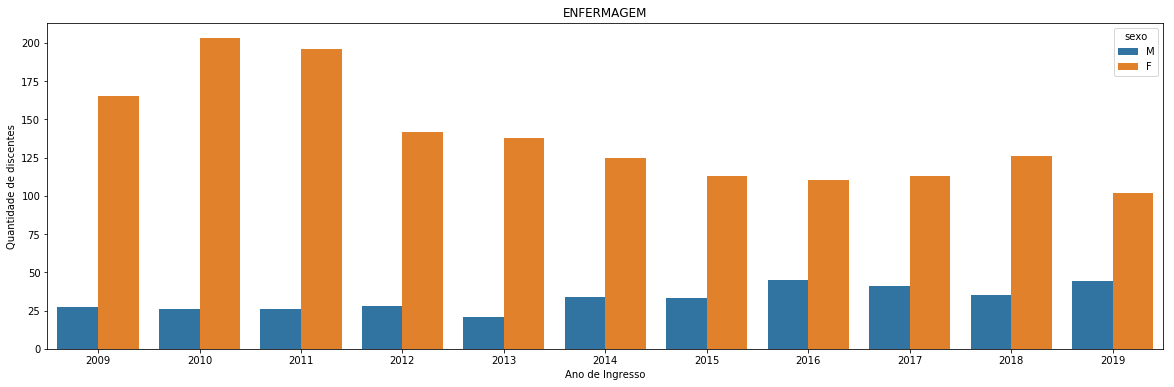

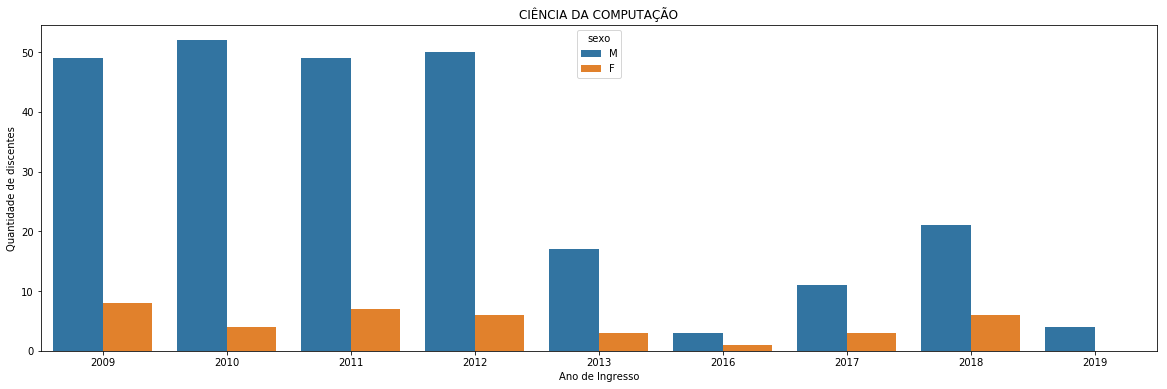

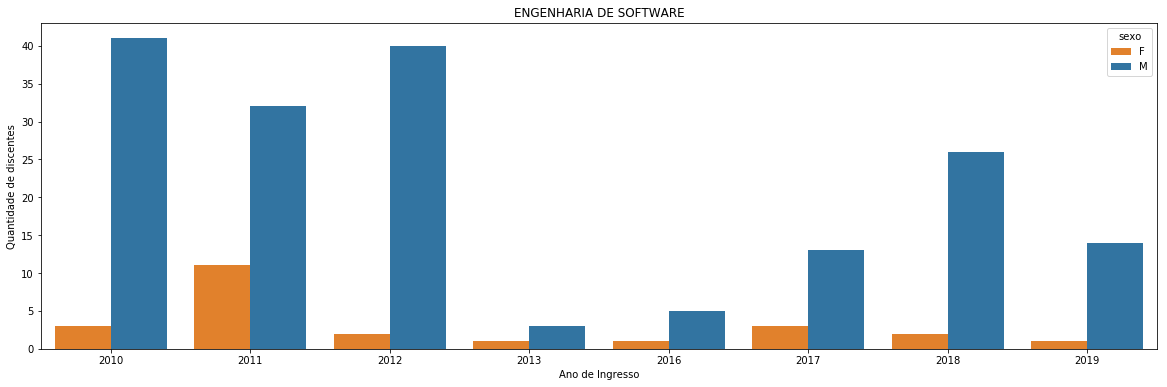

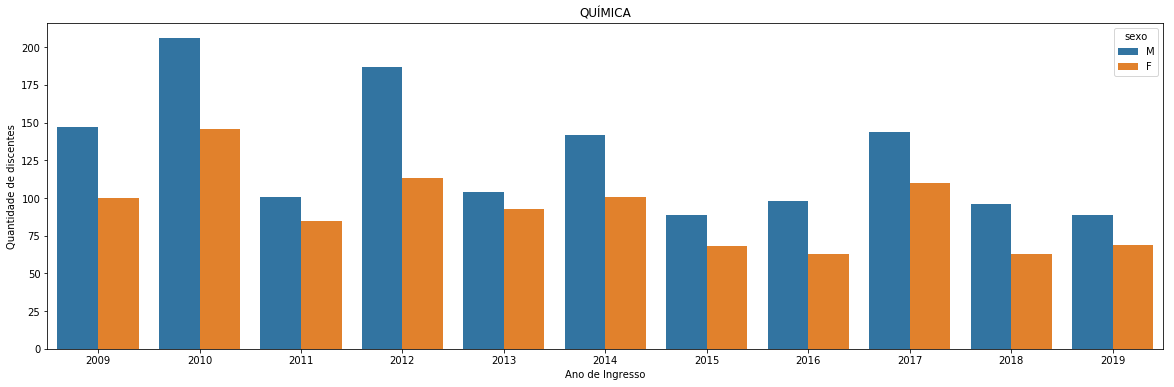

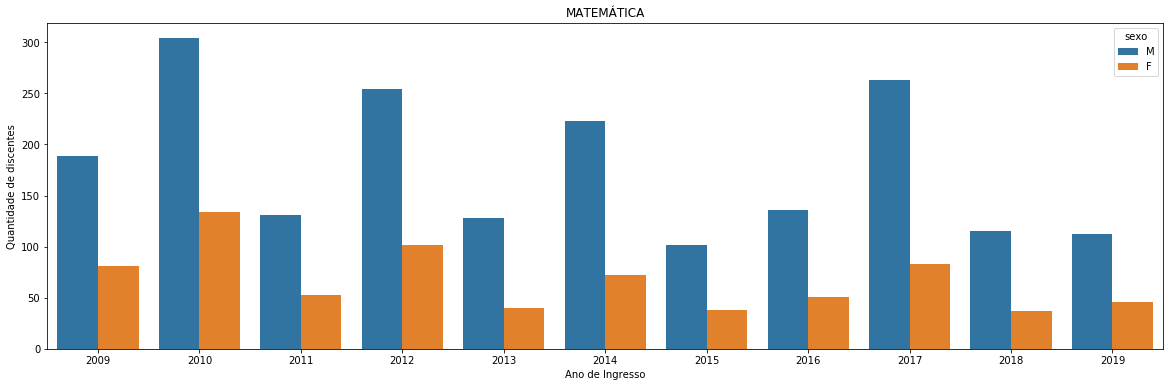

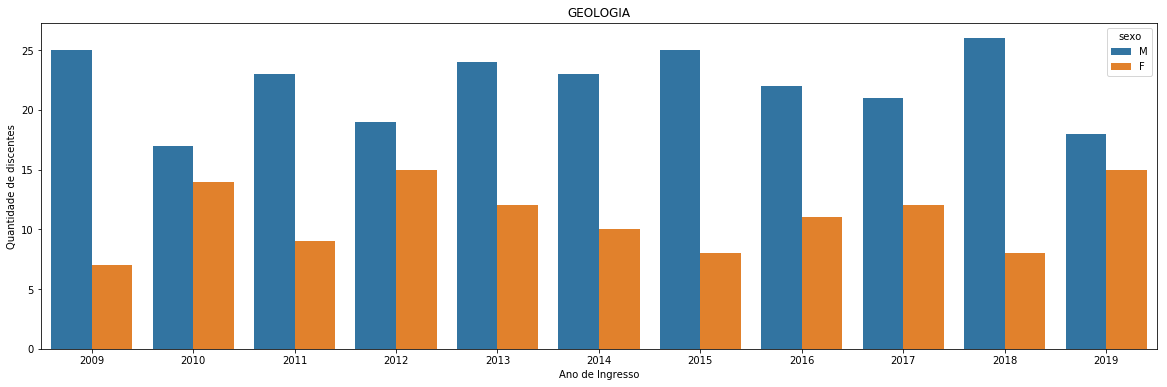

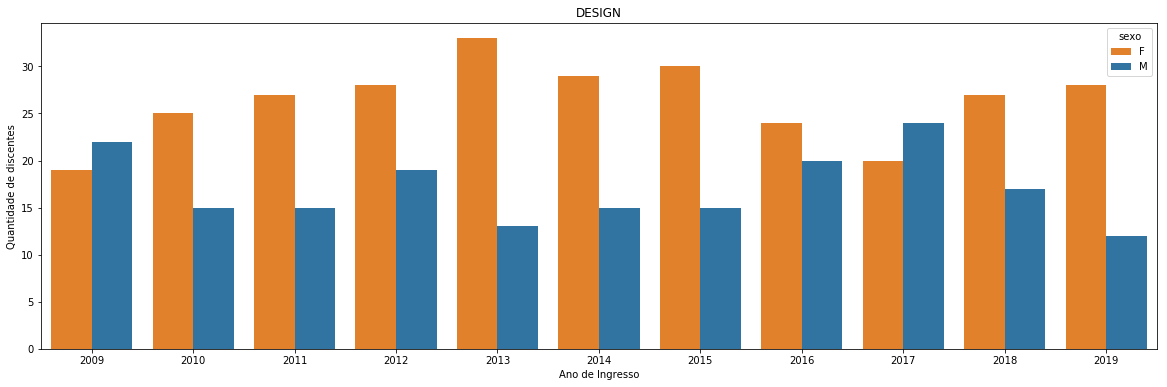

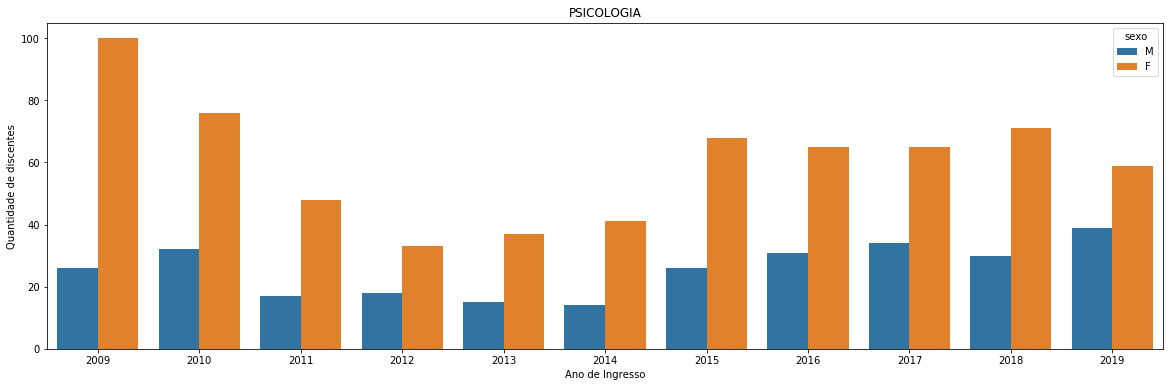

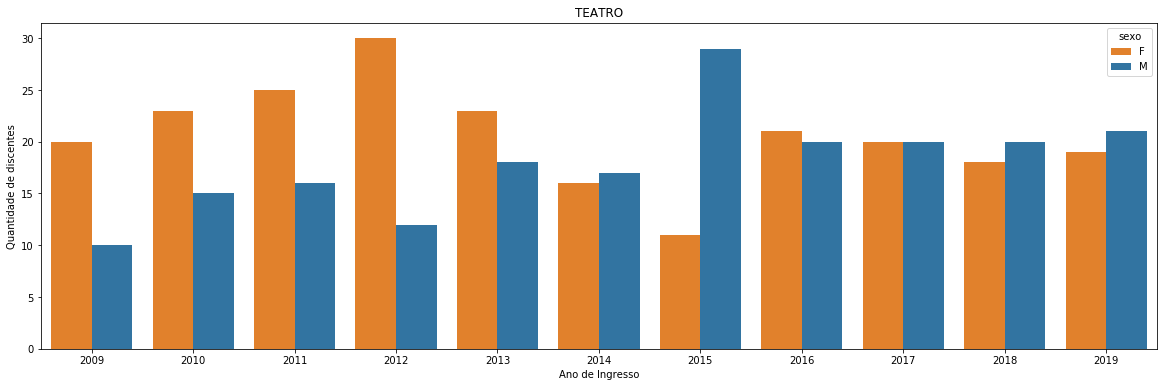

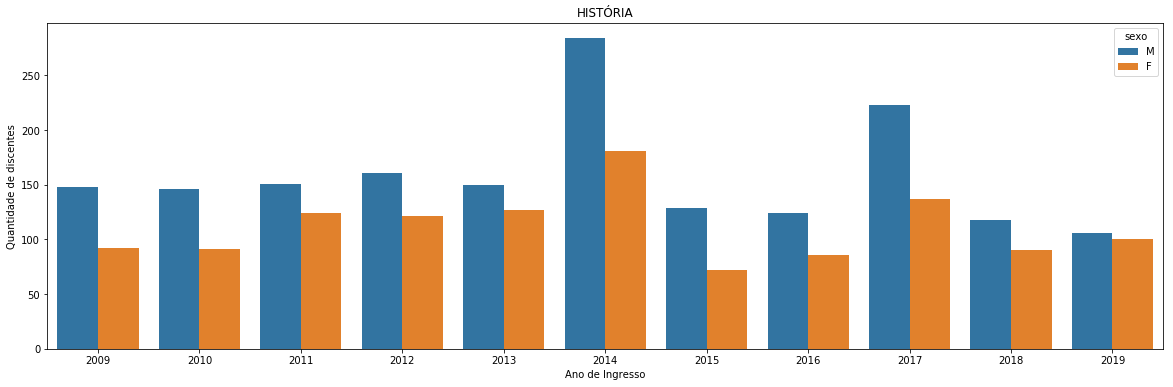

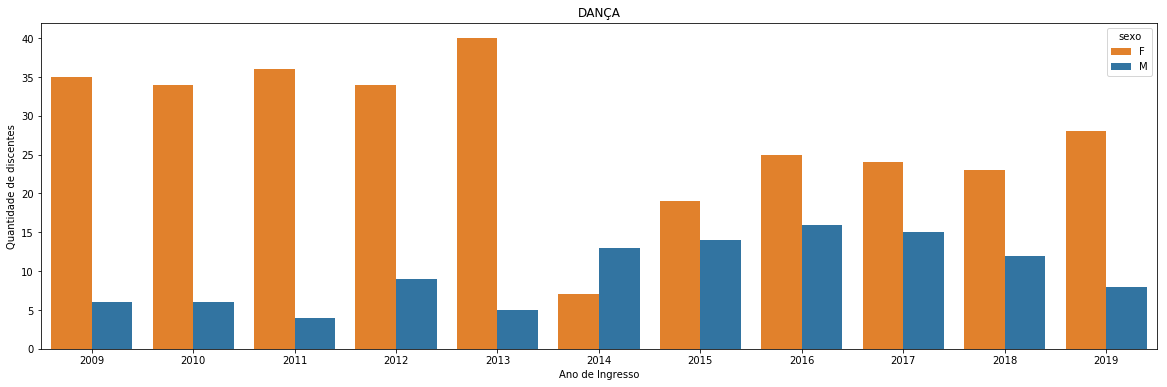

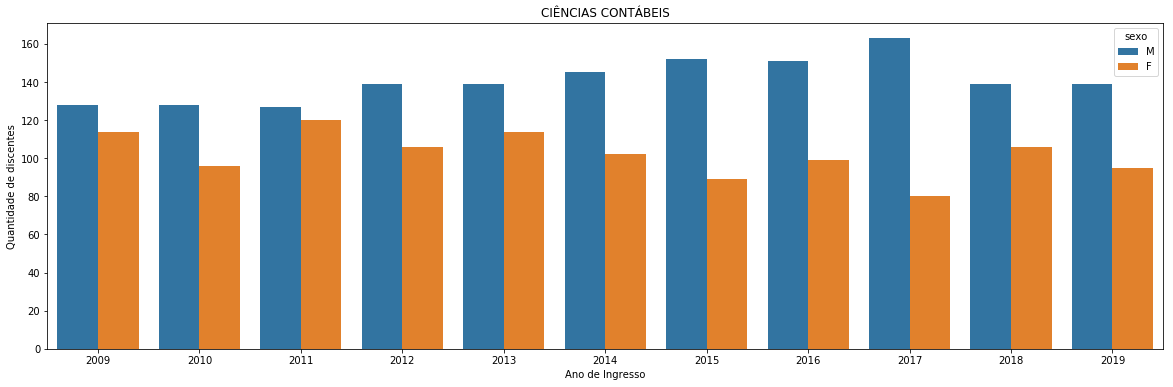

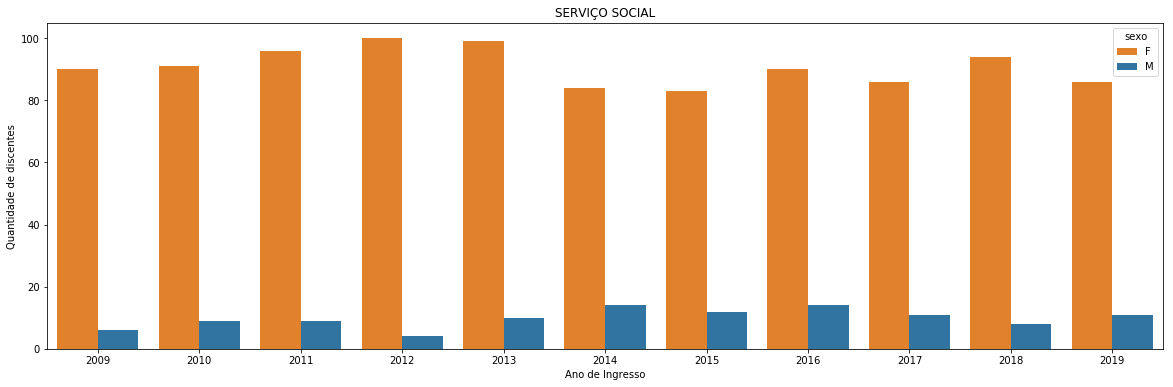

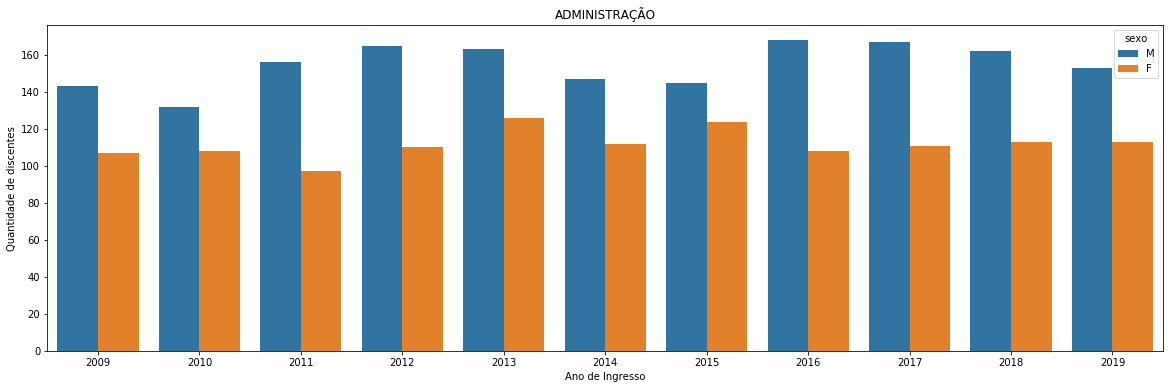

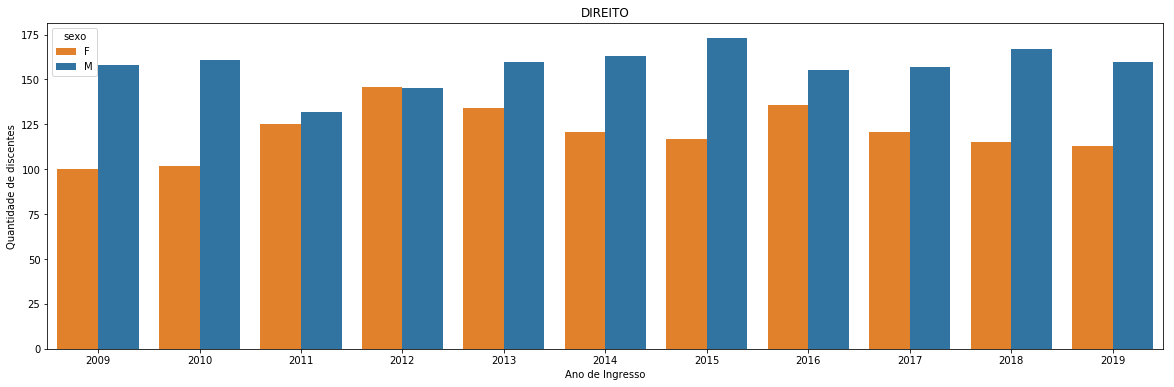

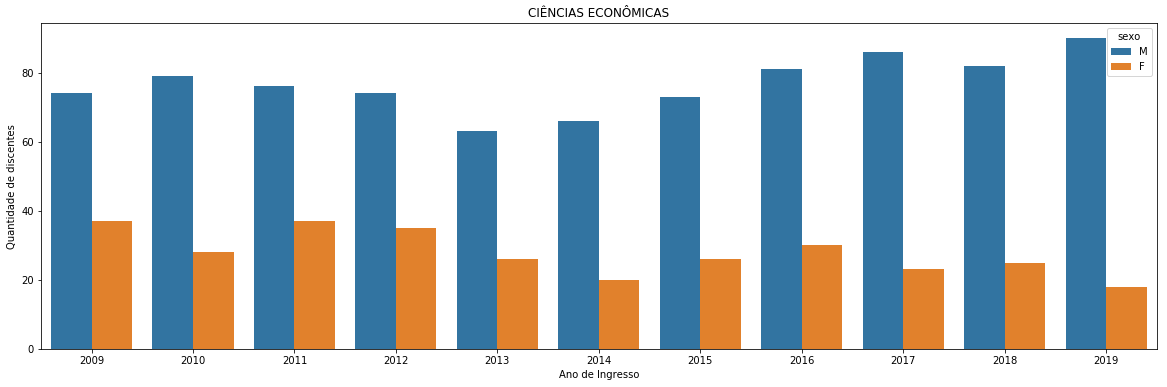

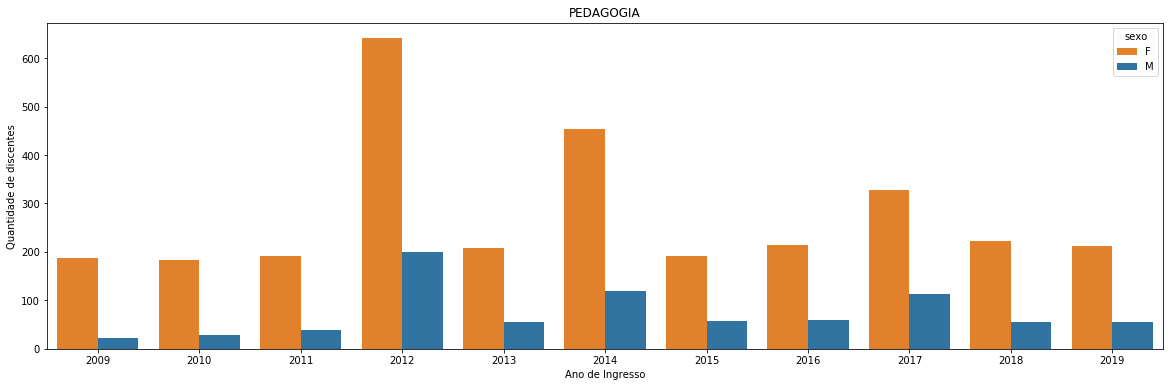

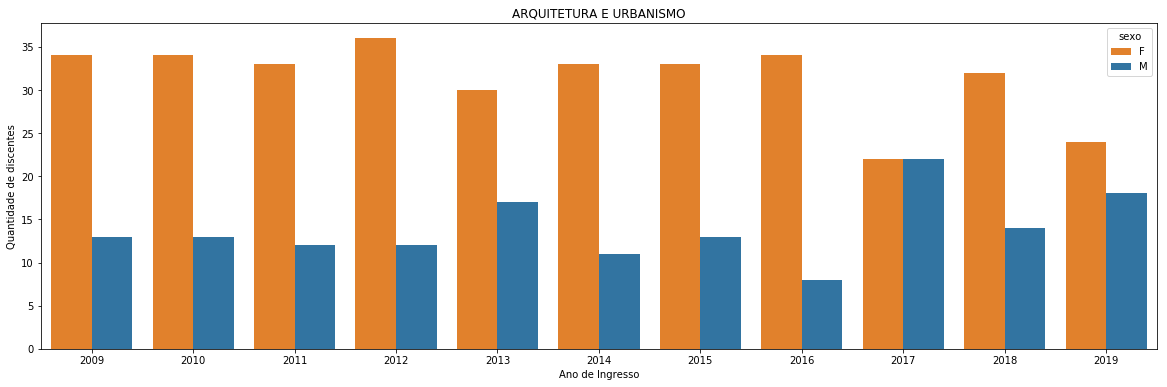

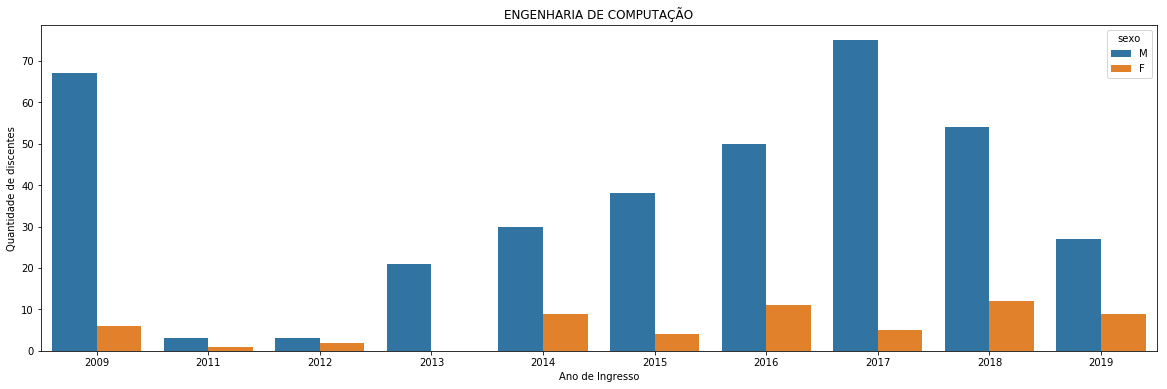

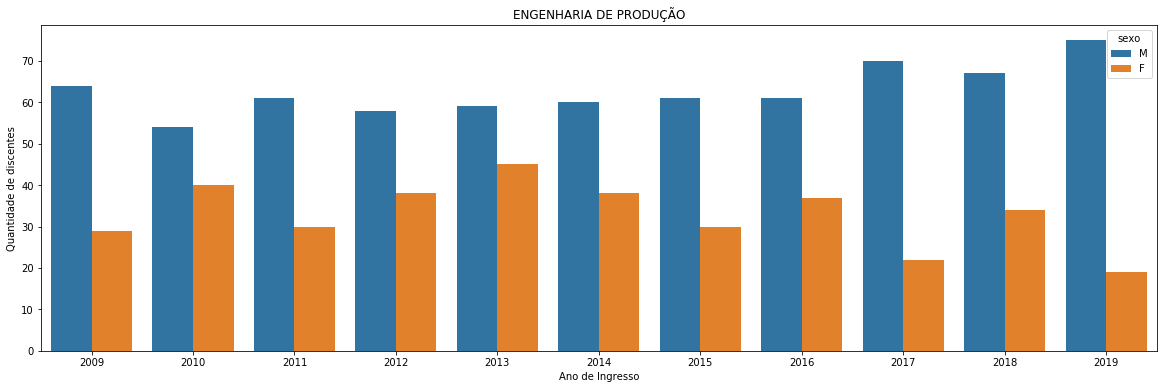

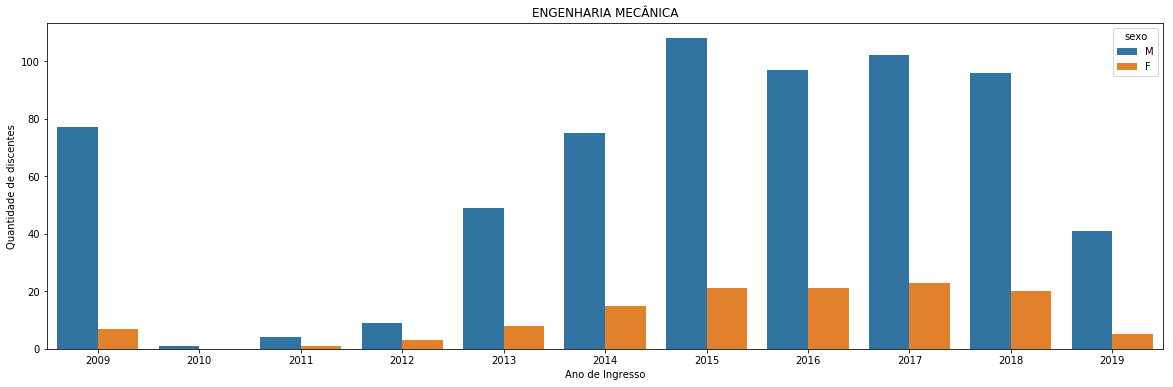

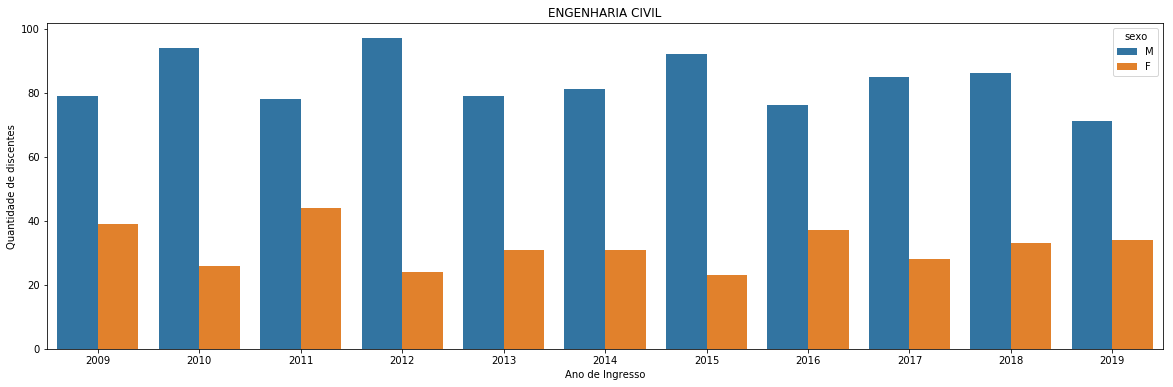

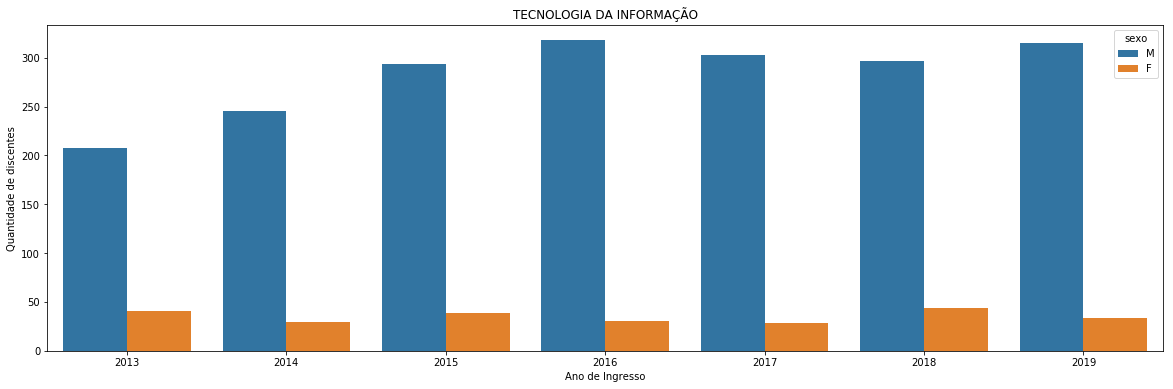

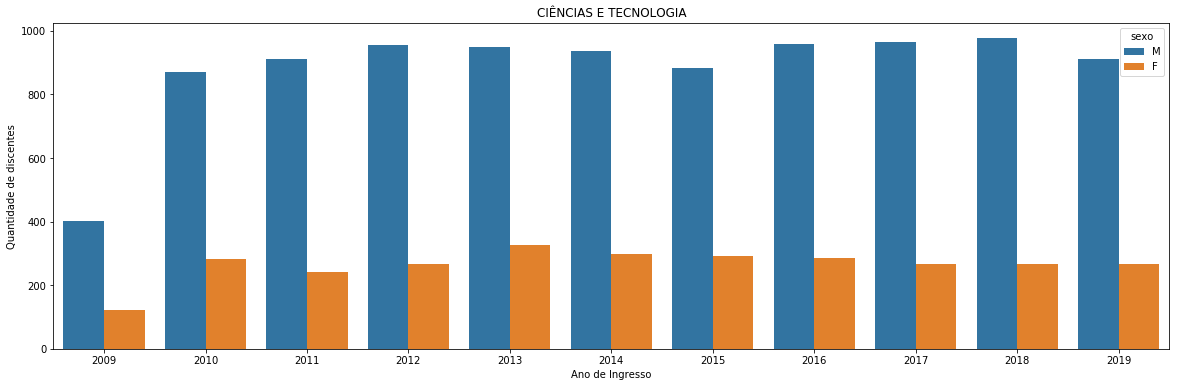

In [105]:
# Definição da paleta de cores a ser utilizada
paleta = {'M':'C0', 'F':'C1'}

# Gráfico com todos os cursos de Graduação
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Todos os cursos de Graduação')
ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = graduacao_sexo, palette = paleta)
ax.set_xlabel('Ano de Ingresso')
ax.set_ylabel('Quantidade de discentes')
plt.show()

# Gráfico por curso de Graduação
for i in range(32):
  curso = graduacao_sexo.loc[graduacao_sexo['nome_curso'] == lista_cursos[i]]
  fig, ax = plt.subplots(figsize=(20,6))
  plt.title(lista_cursos[i])
  ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = curso, palette = paleta)
  ax.set_xlabel('Ano de Ingresso')
  ax.set_ylabel('Quantidade de discentes')
  plt.show()

##### 1. Centro de Biociências - CB

* **Biomedicina:** o curso é predominantemente feminino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino.
* **Ciências Biológicas:** o curso é predominantemente feminino, mas não em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino.
* **Ecologia:** o curso é predominantemente feminino. Nos anos de 2010 e 2011, o número de ingressantes do sexo masculino não chegou nem a 50% do número de ingressantes do sexo feminino. Em todo o período analisado, apenas em 2014 o número de ingressantes do sexo masculino foi superior ao de ingressantes do sexo feminino.
* **Engenharia de Aquicultura:** é o curso mais igualitário do centro. Em todo o período analisado, nos anos de 2009, 2011 e 2013 o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino, o do meio, inclusive, sendo quase o dobro. Uma curiosidade é que, no ano de 2010, o número de ingressantes do sexo masculino e do sexo feminino foram exatamente iguais. Apenas em 2016 o número de ingressantes do sexo masculino foi maior que o dobro do sexo feminino. Nos demais anos, a superioridade masculina (em termos quantitativos) se manteve, mas não houve discrepância.

##### 2. Centro de Ciências da Saúde - CCS

* **Educação Física:** o curso é predominantemente masculino, mas não em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino. Nos anos de 2012 e 2017, essa diferença foi mais visível, tendo o número de ingressantes do sexo masculino maior que ou o dobro do sexo feminino.
* **Farmácia:** o curso é predominantemente feminino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino.
* **Medicina:** o curso é predominantemente masculino, mas não em larga escala. Nos anos de 2012 e 2013 o número de ingressantes do sexo feminino foi superior ao do sexo masculino.
* **Odontologia:** o curso é predominantemente feminino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino. Nos anos de 2009 e 2019 houve as menores diferença.
* **Enfermagem:** o curso é predominantemente feminino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino. Ao longo dos anos a diferença vem caindo, mas ainda permanece grande.

##### 3. Centro de Ciências Exatas e da Terra - CCET

* **Ciência da Computação:** o curso é predominantemente masculino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino. Em 2019, inclusive, não houve registro de ingressantes do sexo feminino.
* **Engenharia de Software:** o curso é predominantemente masculino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino. Nos anos de 2013 e 2016 foram os anos com a menor diferença entre os sexos.
* **Química:** o curso é predominantemente masculino, mas não em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino.
* **Matemática:** o curso é predominantemente masculino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino.
* **Geologia:** o curso é predominantemente masculino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino. Nos anos de 2010, 2012 e 2019, houve as menores diferenças.

##### 4. Centro de Ciências Humanas, Letras e Artes - CCHLA

* **Design:** o curso é predominantemente feminino, mas não em larga escala. Em todo o período analisado, apenas nos anos de 2009 e 2017 o número de ingressantes do sexo masculino foi superior ao de ingressantes do sexo feminino.
* **Psicologia:** o curso é predominantemente feminino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino.
* **Teatro:** é o curso mais igualitário do centro. Nos últimos anos, o número de ingressantes do sexo masculino vem tendo crescimento em relação ao sexo feminino. O curso é tão igualitário que, no ano de 2017, o número de ingressantes foi igual em relação aos sexos.
* **História:** o curso é predominantemente masculino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino. No ano de 2019 foi encontrada a menor diferença quantitativa entre os sexos.
* **Dança:** o curso é predominantemente feminino e em larga escala. Em todo o período analisado, apenas em 2014 o número de ingressantes do sexo masculino foi superior ao de ingressantes do sexo feminino. Mesmo assim, o número de ingressantes do sexo feminino ainda é bem superior.

##### 5. Centro de Ciências Sociais Aplicadas - CCSA

* **Ciências Contábeis:** o curso é predominantemente masculino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino.
* **Serviço Social:** o curso é predominantemente feminino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino.
* **Administração:** o curso é predominantemente masculino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino.
* **Direito:** o curso é predominantemente masculino. Em todo o período analisado, apenas no ano de 2012  que o número de ingressantes do sexo feminino foi superior ao de ingressantes do sexo masculino e por muito pouco.
* **Ciências Econômicas:** o curso é predominantemente masculino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino.

##### 6. Centro de Educação - CE

* **Pedagogia:** o curso é predominantemente feminino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino.

##### 7. Centro de Tecnologia - CT

* **Arquitetura e Urbanismo:** o curso é predominantemente feminino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino, apenas no ano de 2017, esse número foi igual.
* **Engenharia de Computação:** o curso é predominantemente masculino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo masculino tenha sido superior ao de ingressantes do sexo feminino. A discrepância é de tão fácil percepção que, no ano de 2013, não foi registrado ingressantes do sexo feminino.
* **Engenharia de Produção:** o curso é predominantemente masculino. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino.
* **Engenharia Mecânica:** o curso é predominantemente masculino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino. No ano de 2010, não foi registrado ingressantes do sexo feminino.
* **Engenharia Civil:** o curso é predominantemente masculino e em uma escala considerável. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino. 

##### 8. Instituto Metrópole Digital - IMD

* **Tecnologia da Informação:** o curso é predominantemente masculino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino.

##### 9. Escola de Ciência e Tecnologia - ECT

* **Ciências e Tecnologia:** o curso é predominantemente masculino e em larga escala. Em todo o período analisado, não houve nenhum ano em que o número de ingressantes do sexo feminino tenha sido superior ao de ingressantes do sexo masculino.

#### 2. Análise da diferença de etnias nos cursos de Graduação da UFRN

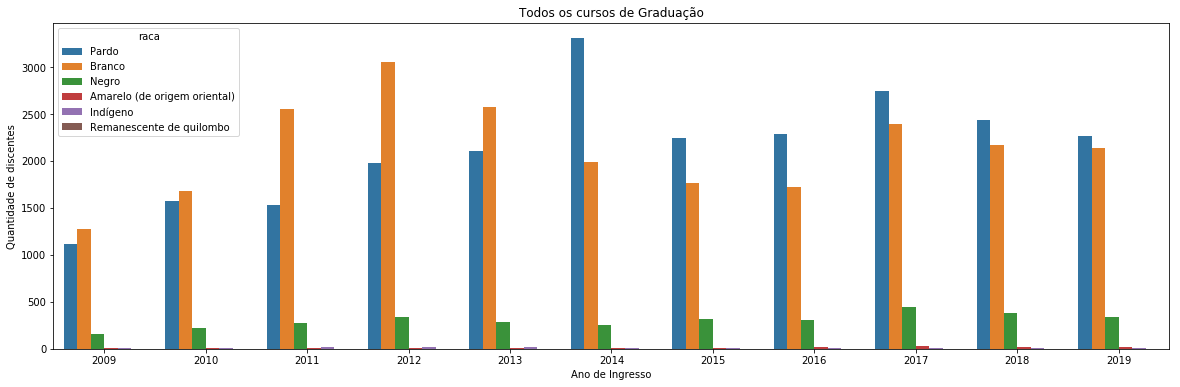

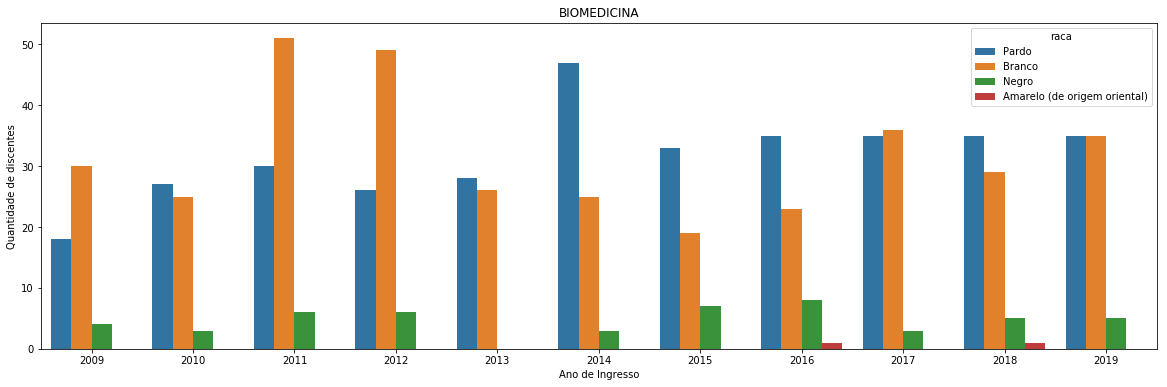

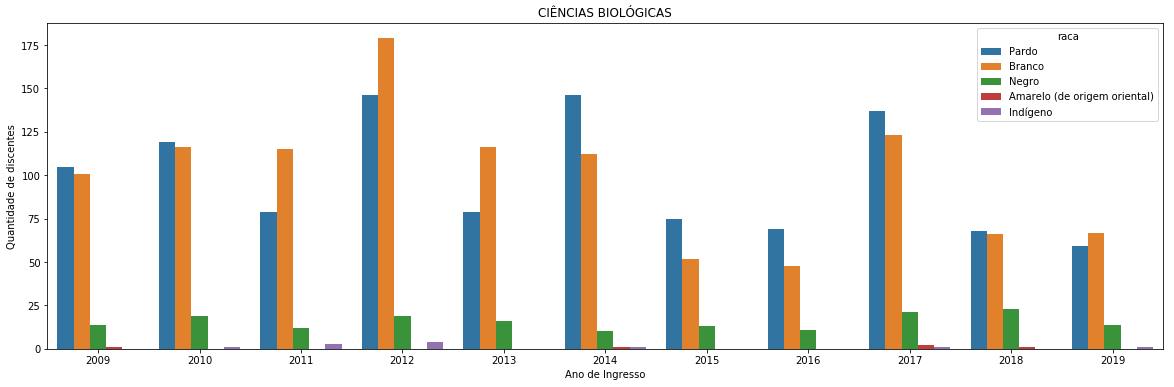

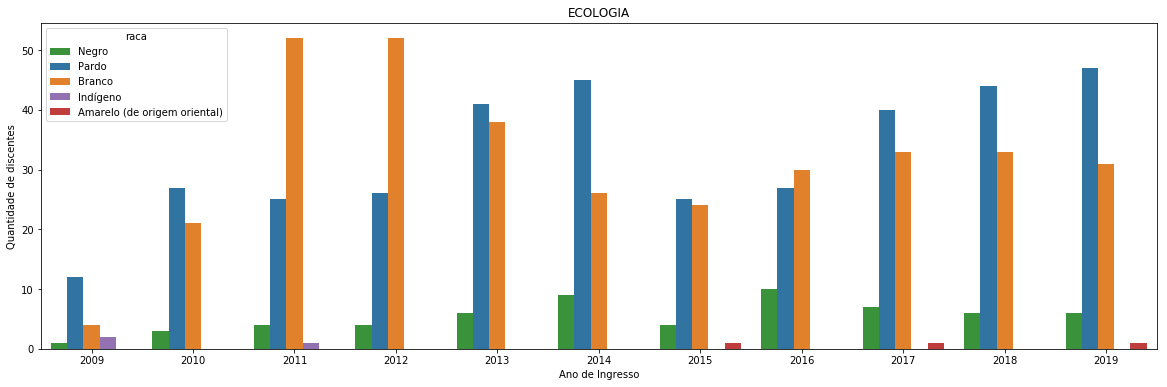

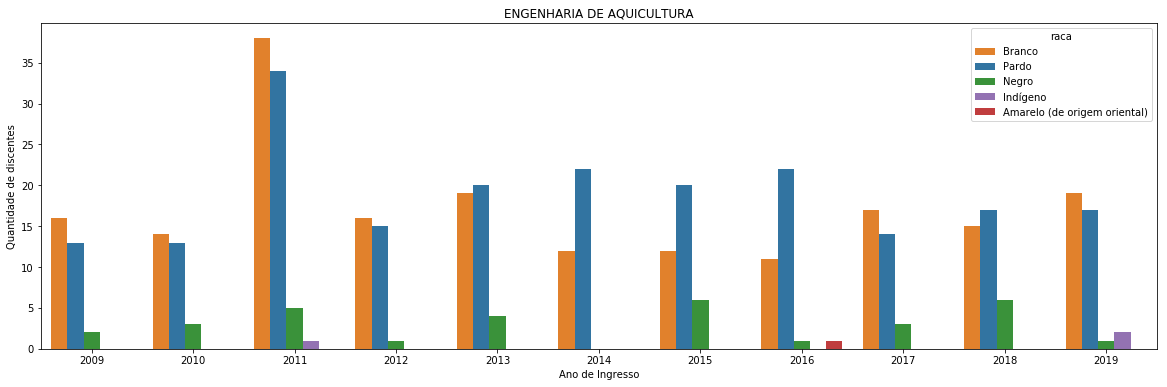

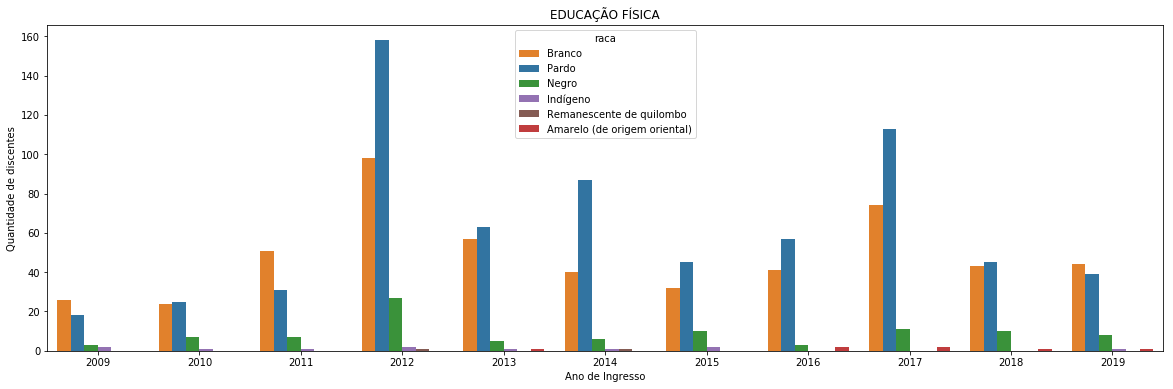

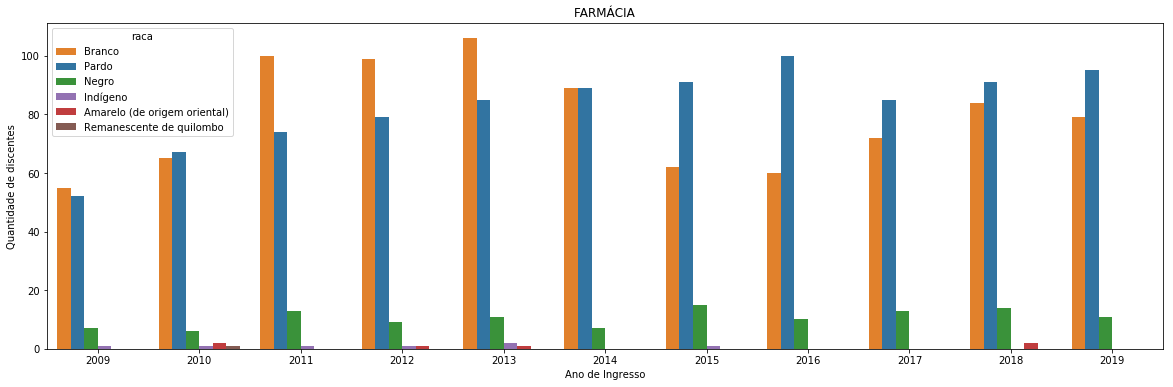

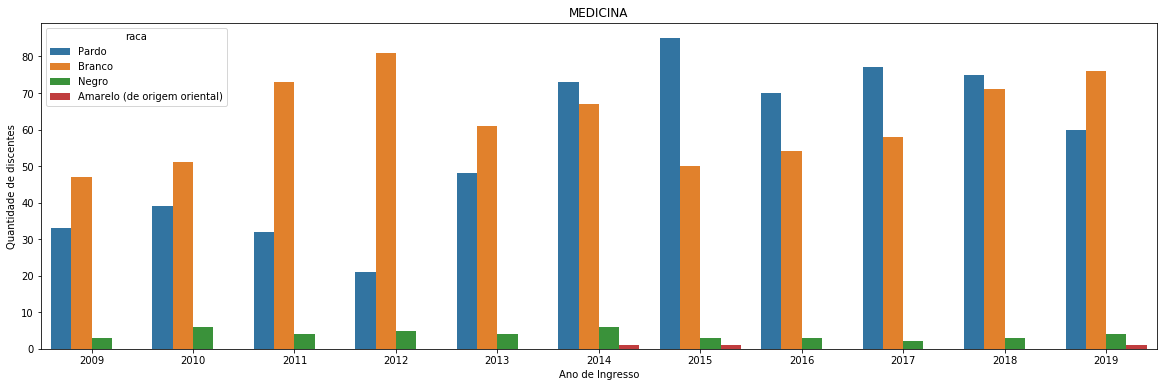

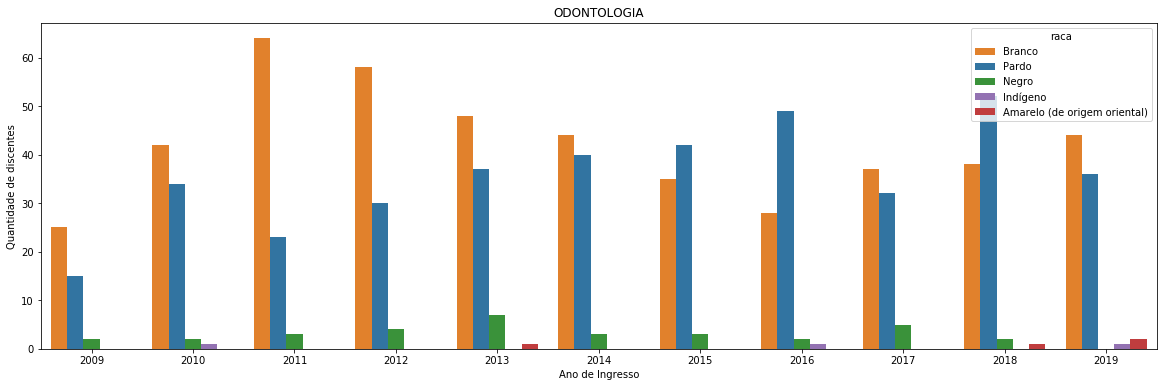

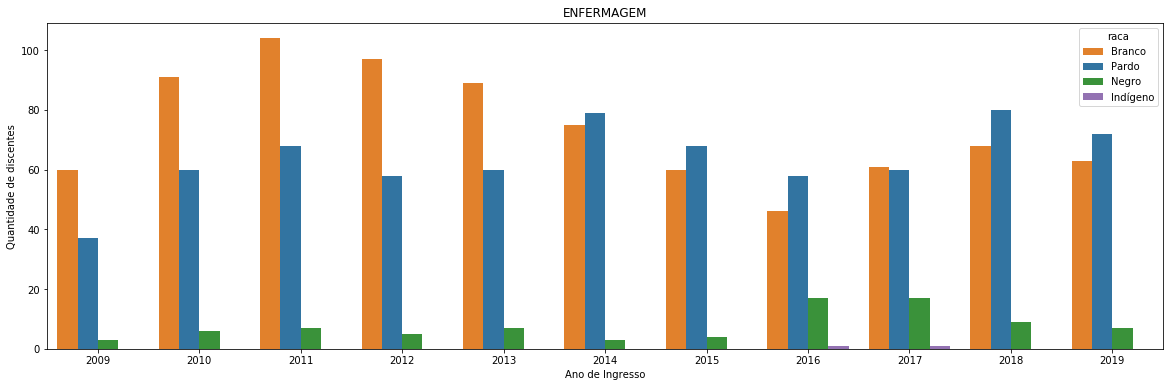

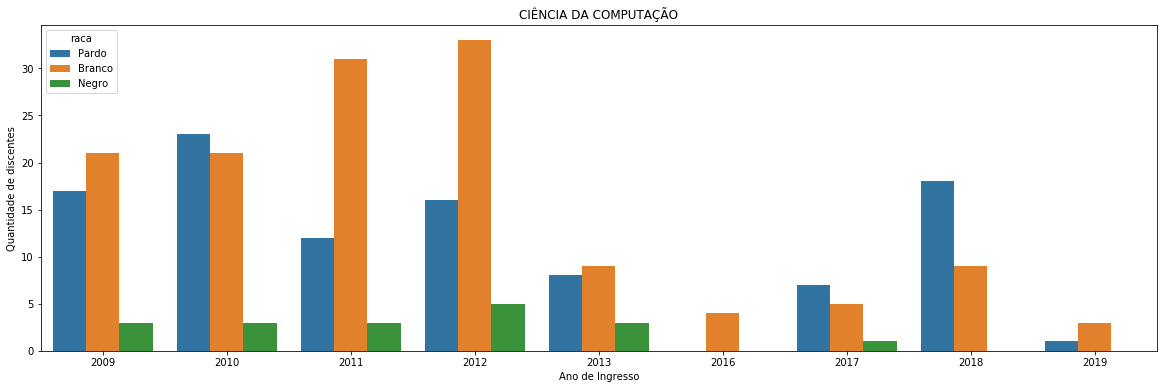

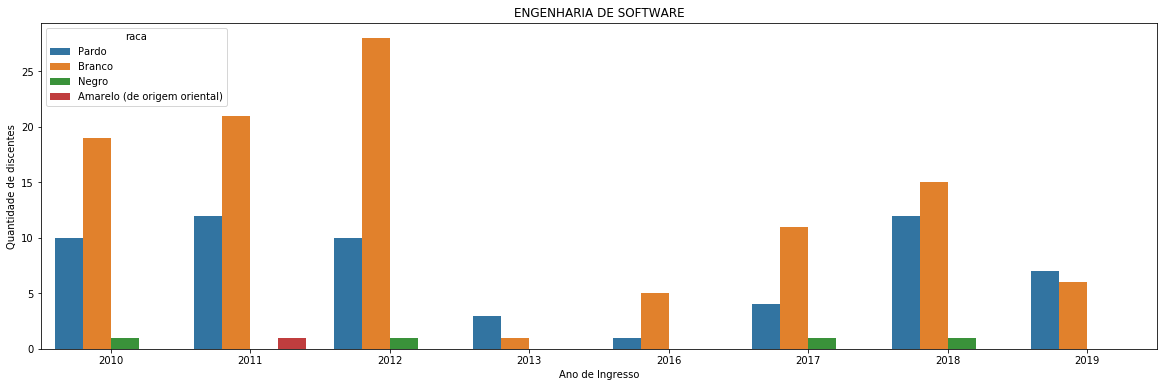

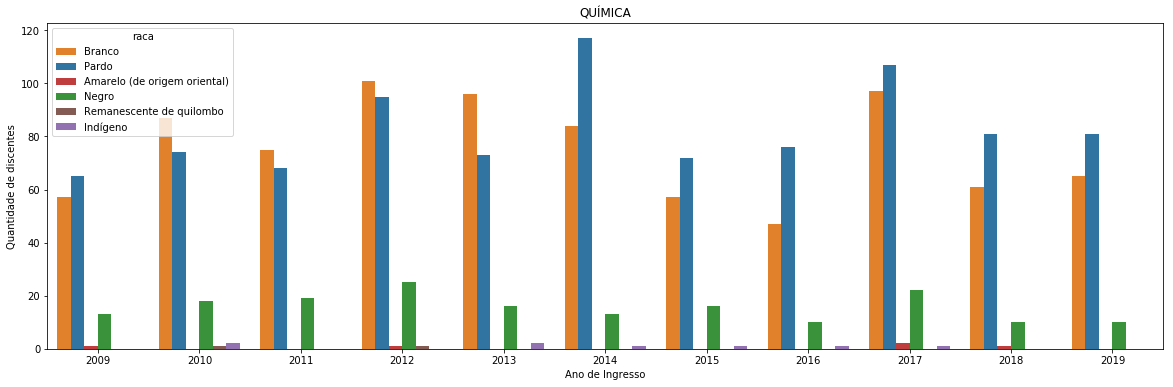

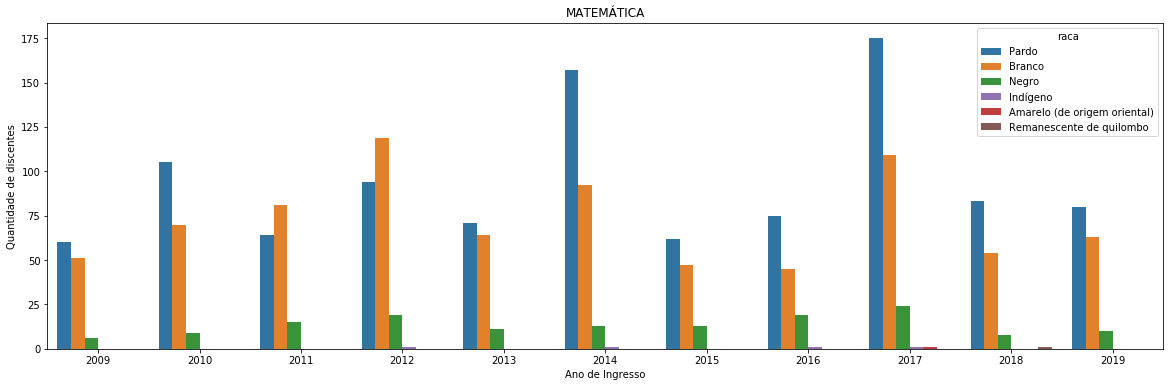

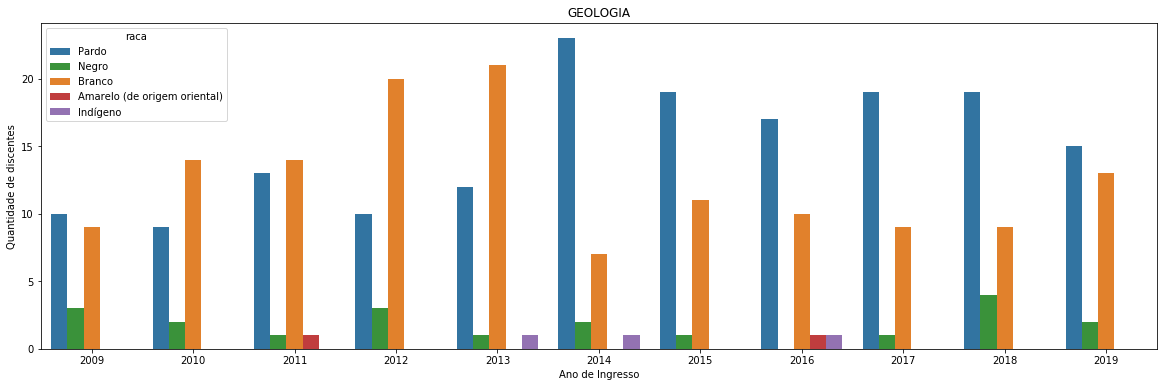

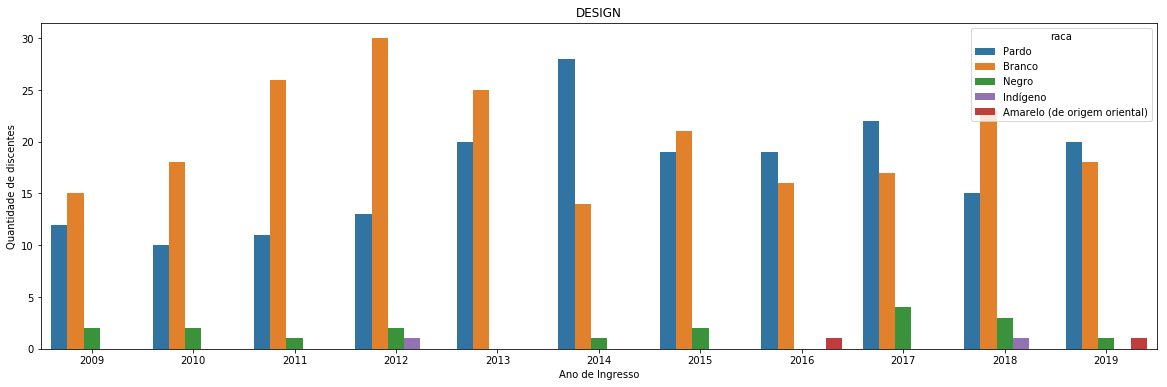

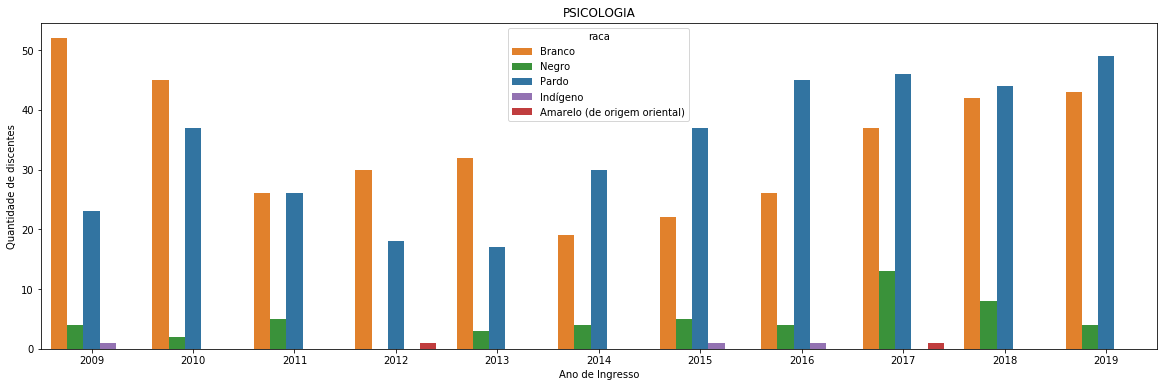

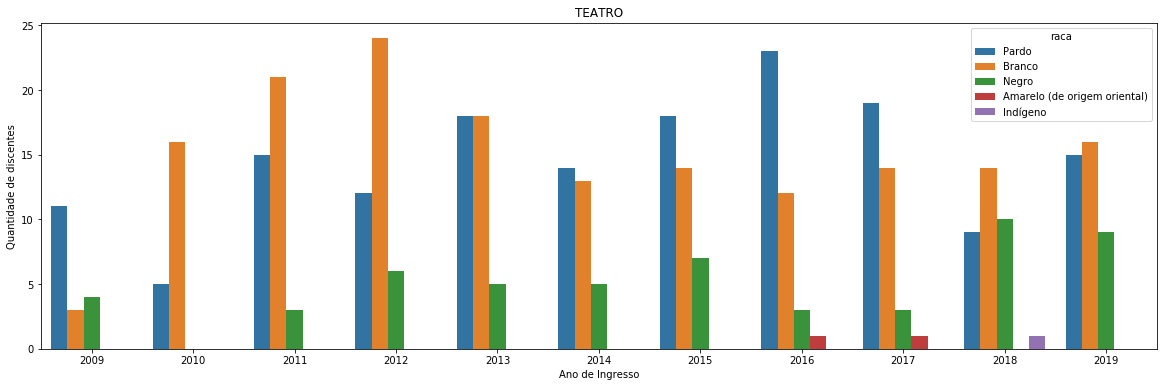

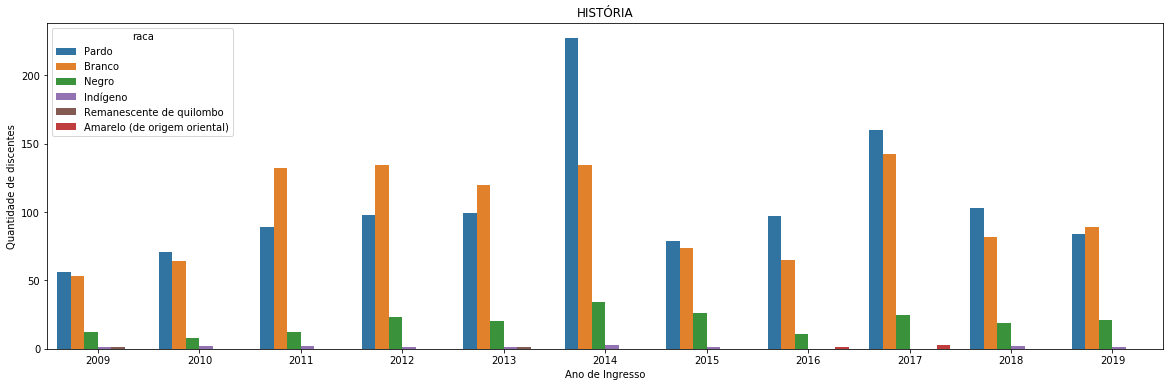

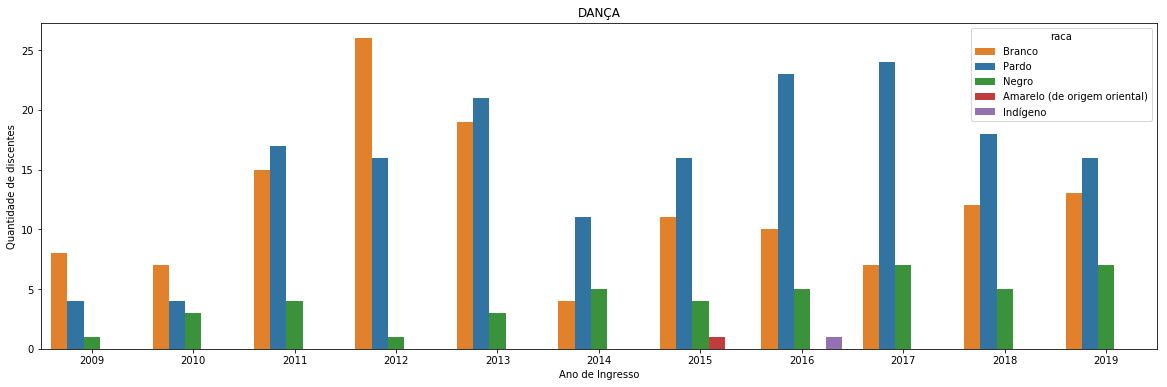

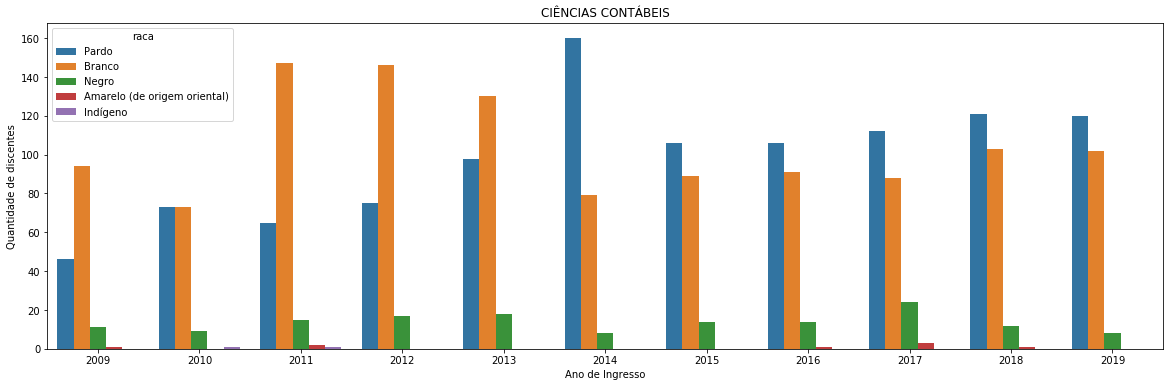

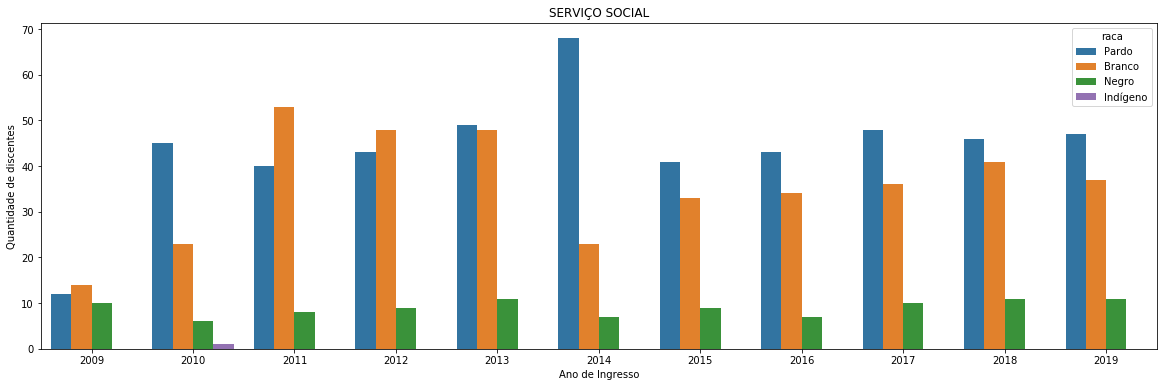

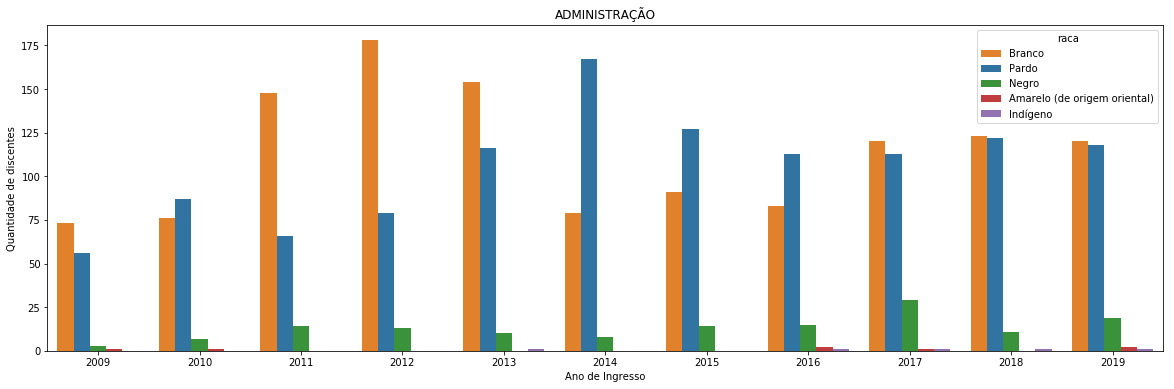

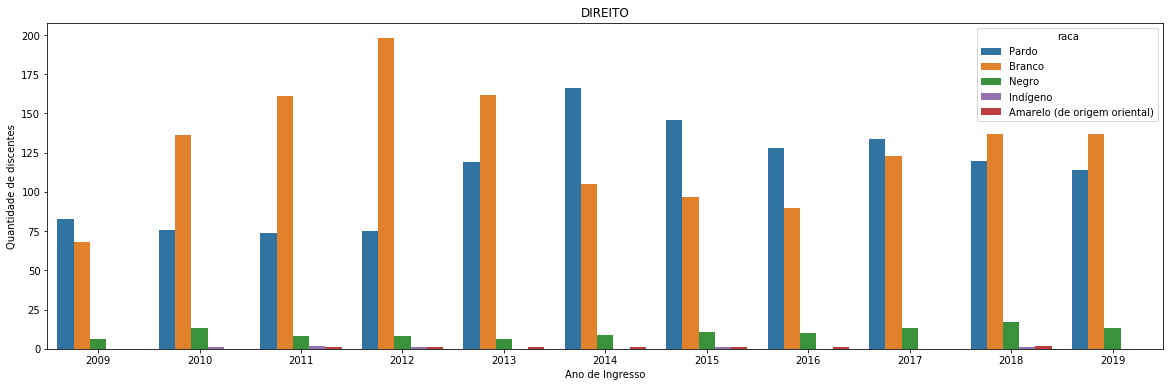

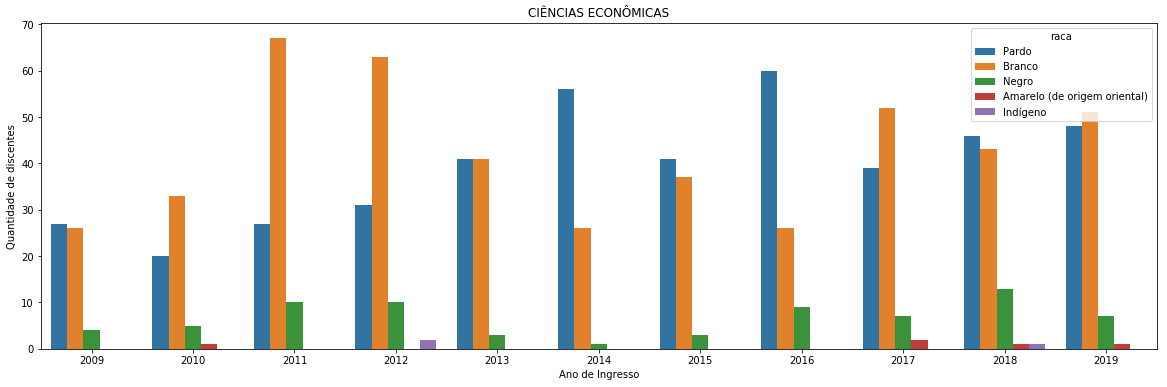

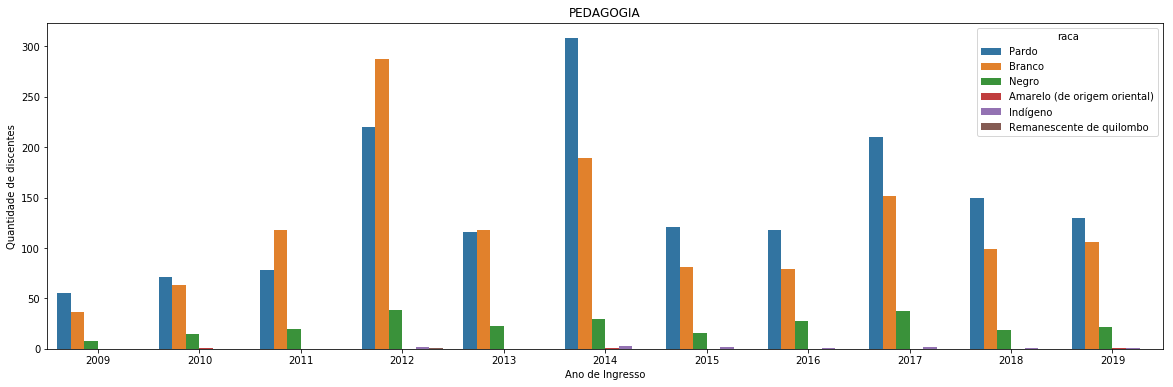

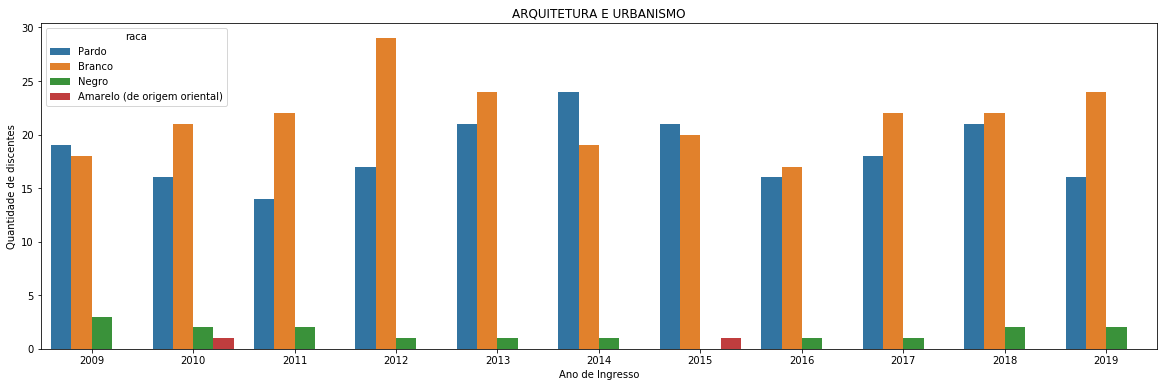

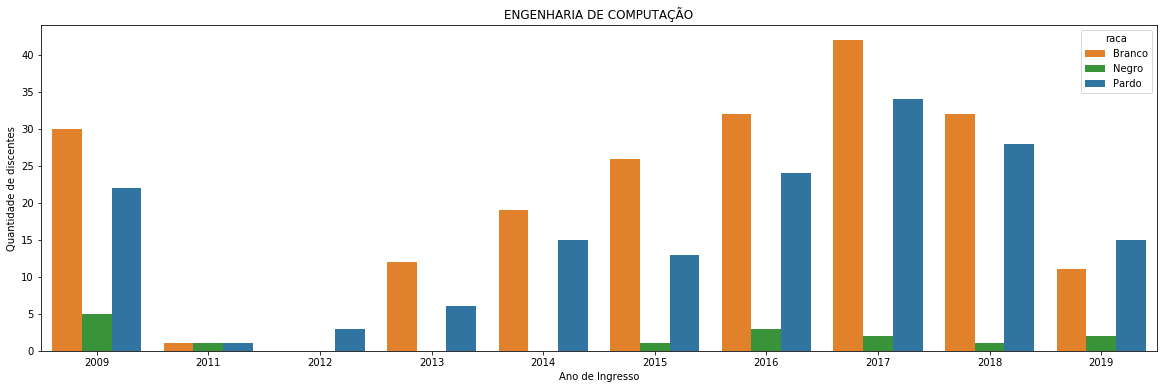

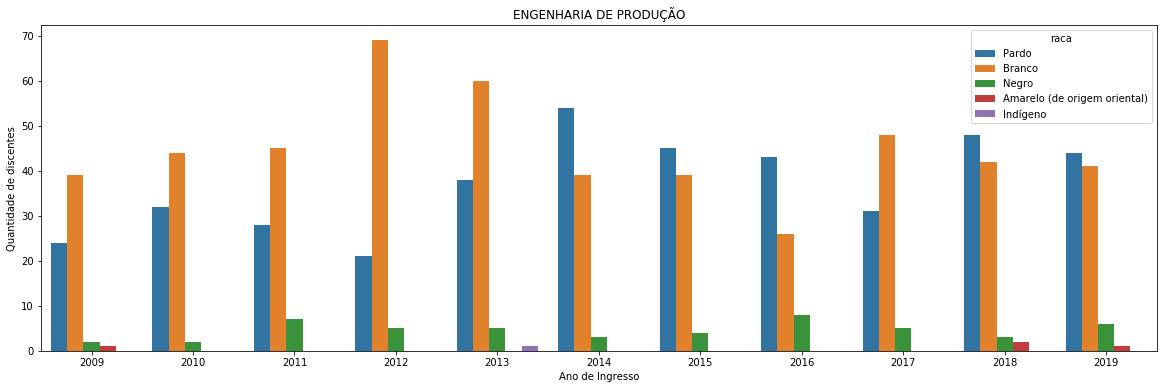

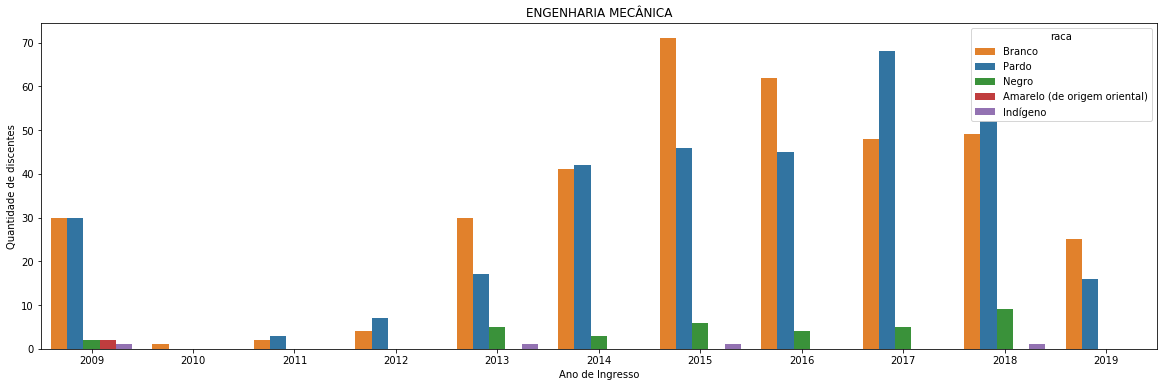

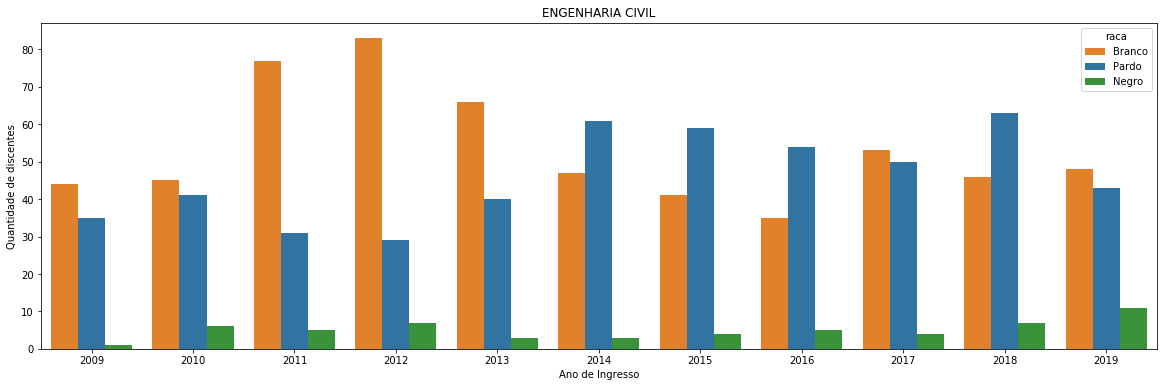

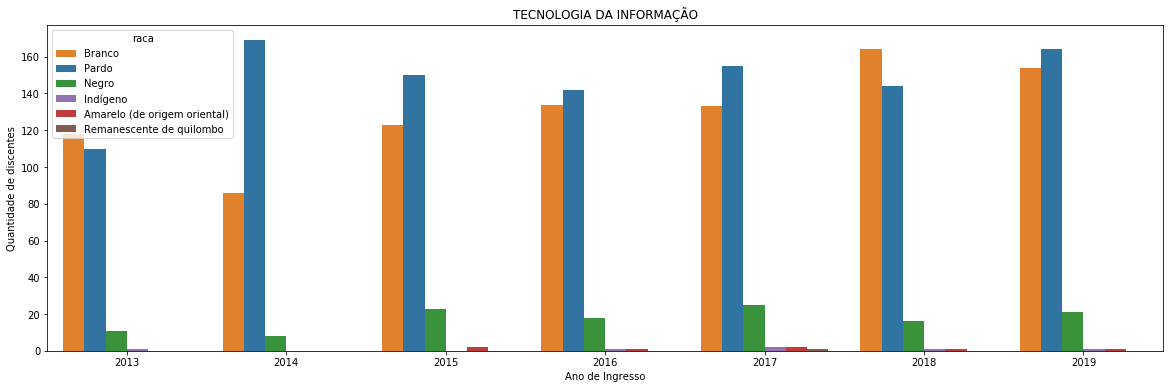

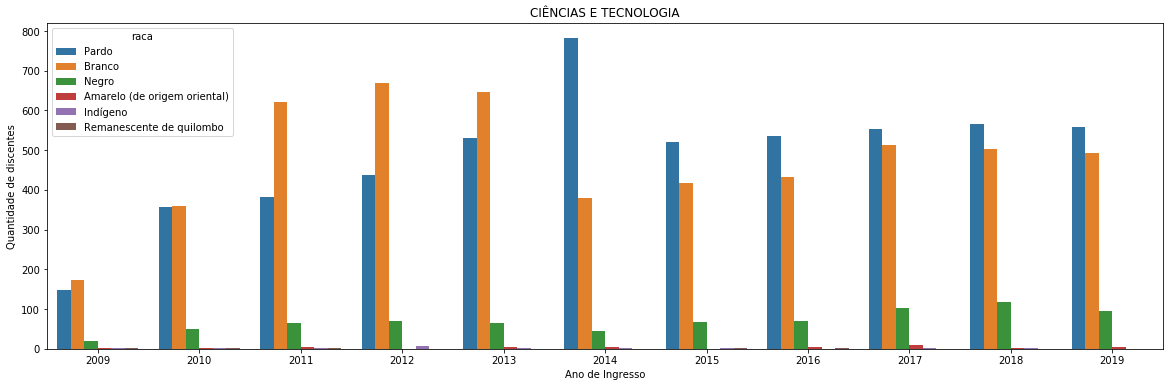

In [106]:
# Definição da paleta de cores a ser utilizada
paleta = {"Pardo":"C0", "Branco":"C1", "Negro":"C2", "Amarelo (de origem oriental)":"C3", "Indígeno":"C4", "Remanescente de quilombo":"C5"}

# Gráfico com todos os cursos de Graduação
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Todos os cursos de Graduação')
ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = graduacao_raca, palette = paleta)
ax.set_xlabel('Ano de Ingresso')
ax.set_ylabel('Quantidade de discentes')
plt.show()

# Gráfico por curso de Graduação
for i in range(32):
  curso = graduacao_raca.loc[graduacao_raca['nome_curso'] == lista_cursos[i]]
  fig, ax = plt.subplots(figsize=(20,6))
  plt.title(lista_cursos[i])
  ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = curso, palette = paleta)
  ax.set_xlabel('Ano de Ingresso')
  ax.set_ylabel('Quantidade de discentes')
  plt.show()

##### 1. Centro de Biociências - CB

* **Biomedicina:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental). Ingressantes da etnia indígena e remanescentes de quilombola não foram registrados no período.
* **Ciências Biológicas:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Ecologia:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Engenharia de Aquicultura:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos indígenas. Ingressantes amarelos (de orgiem oriental) foram registrados apenas em 2016. Já ingressantes da etnia remanescentes de quilombola não foram registrados no período.

##### 2. Centro de Ciências da Saúde - CCS

* **Educação Física:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da segunda, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola foram registrados nos anos de 2012 e 2014.
* **Farmácia:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola foram registrados no ano de 2010.
* **Medicina:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental). Ingressantes da etnia indígena e da etnia remanescentes de quilombola não foram registrados no período.
* **Odontologia:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Enfermagem:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos indígenas. Ingressantes da etnia amarelo (de origem oriental) e da etnia remanescentes de quilombola não foram registrados no período.

##### 3. Centro de Ciências Exatas e da Terra - CCET

* **Ciência da Computação:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da primeira, e com alguns negros. Ingressantes das etnias amarelo (de orgiem oriental), indígena e remanescentes de quilombola não foram registrados no período.
* **Engenharia de Software:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da primeira, com alguns negros e pouquíssimos amarelos (de origem oriental) - registrado apenas no ano de 2011. Ingressantes da etnia indígena e da etnia remanescentes de quilombola não foram registrados no período.
* **Química:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola foram registrados nos anos de 2010 e 2012.
* **Matemática:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da segunda, com alguns negros e pouquíssimos indígenas. Ingressantes da etnia amarelo (de origem oriental) foram registrados no ano de 2017. Já ingressantes da etnia remanescentes de quilombola foram registrados no ano de 2018.
* **Geologia:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da segunda, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.

##### 4. Centro de Ciências Humanas, Letras e Artes - CCHLA

* **Design:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da primeira, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Psicologia:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Teatro:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental). Ingressantes da etnia indígena foram registrados apenas no ano de 2018. Já ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **História:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola foram registrados nos anos de 2008 e 2013.
* **Dança:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da segunda, e com alguns negros. Ingressantes da etnia amarelo (de origem oriental) foram registrados apenas no ano de 2015 e os ingressantes  da etnia indígena foram resgistrados apenas no ano de 2016. Já ingressantes da etnia remanescentes de quilombola não foram registrados no período.

##### 5. Centro de Ciências Sociais Aplicadas - CCSA

* **Ciências Contábeis:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Serviço Social:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da segunda, e com alguns negros. Ingressantes da etnia indígena foram resgitrados apenas no ano de 2010. Já ingressantes da etnia amarelo (de origem oriental) e da etnia remanescentes de quilombola não foram registrados no período.
* **Administração:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Direito:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Ciências Econômicas:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola não foram registrados no período.

##### 6. Centro de Educação - CE

* **Pedagogia:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da segunda, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola foram registrados apenas no ano de 2012.

##### 7. Centro de Tecnologia - CT

* **Arquitetura e Urbanismo:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da primeira, com alguns negros e pouquíssimos amarelos (de origem oriental). Ingressantes da etnia indígena e da etnia remanescentes de quilombola não foram registrados no período.
* **Engenharia de Computação:** o curso é uma mescla de brancos e pardos, com uma certa vantagem da primeira, e com alguns negros. Ingressantes das etnias amarelo (de orgigem oriental), indígena e remanescentes de quilombola não foram registrados no período.
* **Engenharia de Produção:** o curso é uma mescla de brancos e pardos, com uma certa vantagem do primeiro, com alguns negros e pouquíssimos amarelos (de origem oriental). Ingressantes da etnia indígena foram registrados apenas no ano de 2013. Já ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Engenharia Mecânica:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos indígenas. Ingressantes da etnia amarelo (de orgiem oriental) foram registrados apenas no ano de 2009. Já ingressantes da etnia remanescentes de quilombola não foram registrados no período.
* **Engenharia Civil:** o curso é uma mescla de brancos e pardos e com alguns negros. Ingressantes das etnias amarelo (de orgiem oriental), indígena e remanescentes de quilombola não foram registrados no período.

##### 8. Instituto Metrópole Digital - IMD

* **Tecnologia da Informação:** o curso é uma mescla de brancos e pardos, com uma certa vantagem do segundo, com alguns negros e pouquíssimos amarelos (de origem oriental) e indígenas. Ingressantes da etnia remanescentes de quilombola foram registrados apenas no ano de 2017.

##### 9. Escola de Ciência e Tecnologia - ECT

* **Ciências e Tecnologia:** o curso é uma mescla de brancos e pardos, com alguns negros e pouquíssimos amarelos (de origem oriental), indígenas e remanescentes de quilombola.

## Configuração para a análise dos discentes de Pós-Graduação

In [0]:
# Seleção alunos da pós-graduação
geral_pos = geral.loc[(geral['nivel_ensino'] == 'MESTRADO') | (geral['nivel_ensino'] == 'DOUTORADO')]

# Seleção dos cursos a serem explorados
lista_pos = ["MESTRADO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO", "DOUTORADO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO",
        "MESTRADO EM SISTEMAS E COMPUTAÇÃO", "DOUTORADO EM CIÊNCIA DA COMPUTAÇÃO",
        "MESTRADO PROFISSIONAL EM ENGENHARIA DE SOFTWARE",
        "MESTRADO PROFISSIONAL EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS",
        "MESTRADO EM BIOINFORMÁTICA", "DOUTORADO EM BIOINFORMÁTICA"]

# Seleção dos cursos no dataset
pos_graduacao = geral_pos.loc[geral_pos['nome_curso'].isin(lista_pos)]

# Remoção de linhas que não possui sexo informado
pos_graduacao_sexo = pos_graduacao.loc[pos_graduacao['sexo'] != 'N']

# Remoção de linhas que não possui raça informada
pos_graduacao_raca = pos_graduacao.loc[pos_graduacao['raca'] != 'Não Informado']

#### 1. Análise da diferença de gêneros nos cursos de Pós-Graduação da UFRN

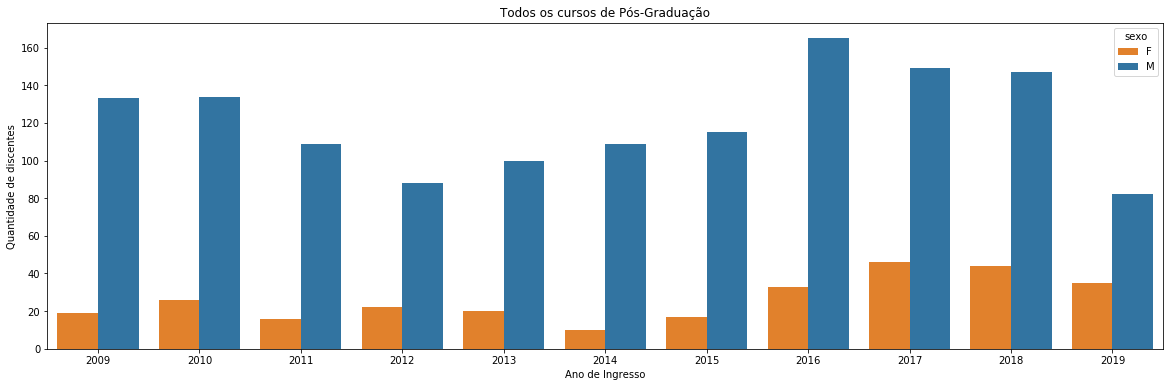

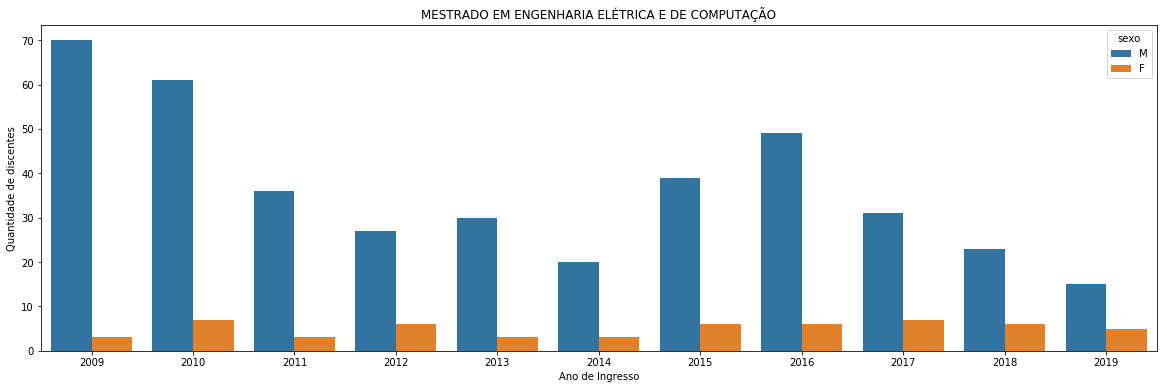

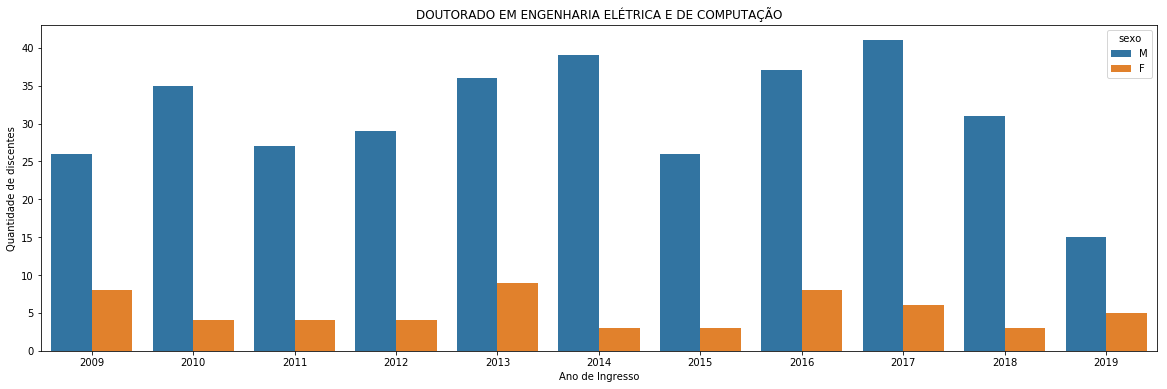

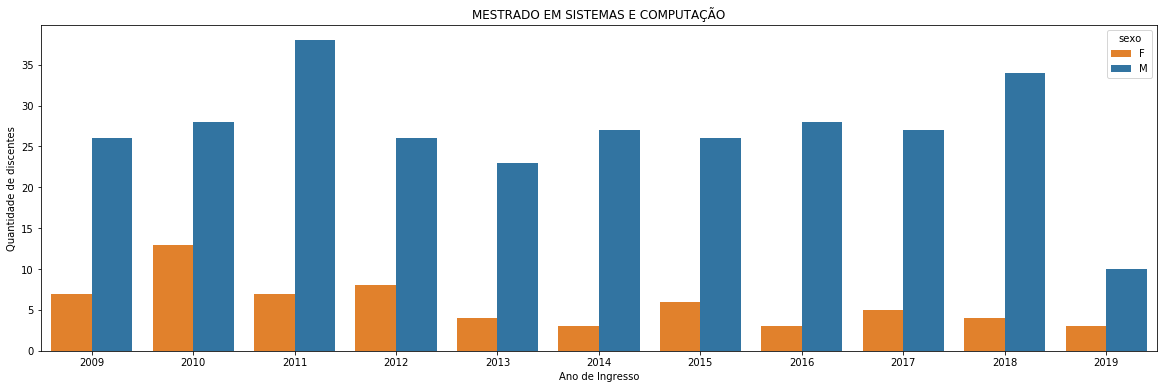

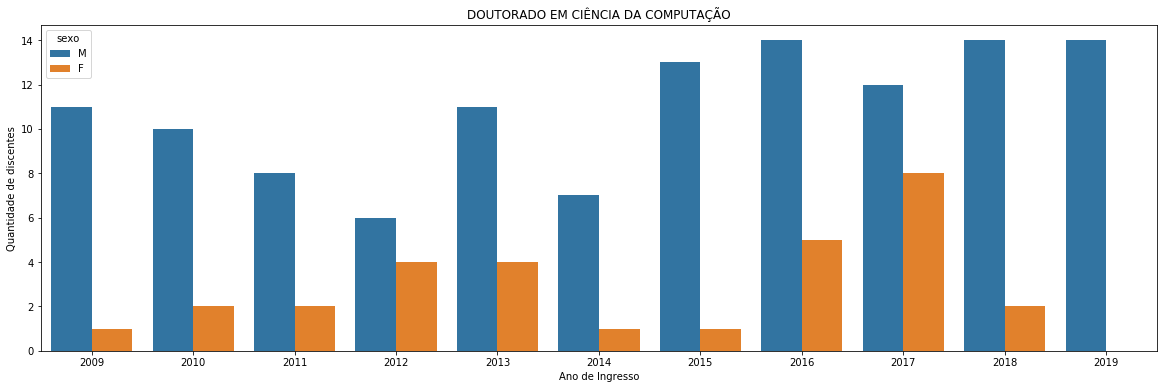

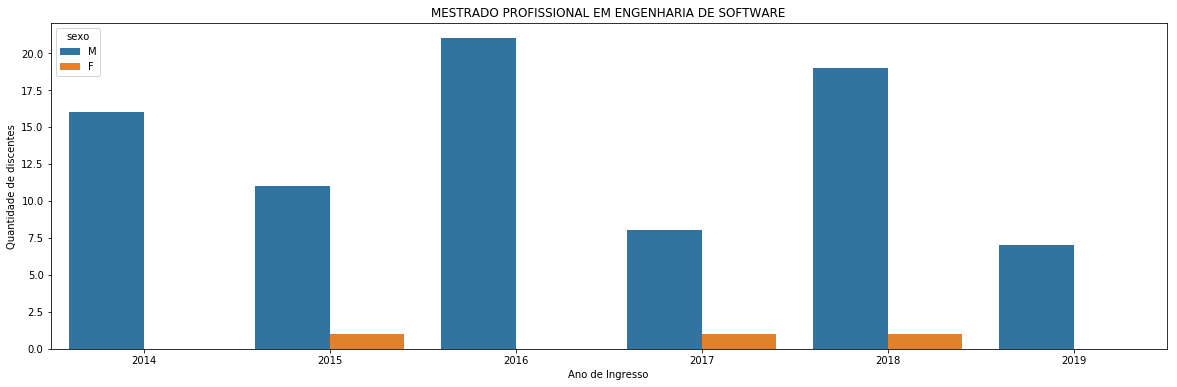

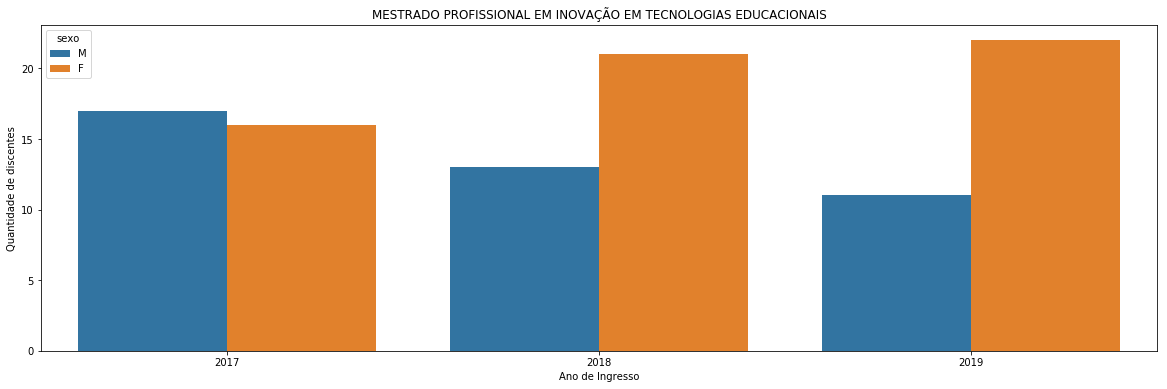

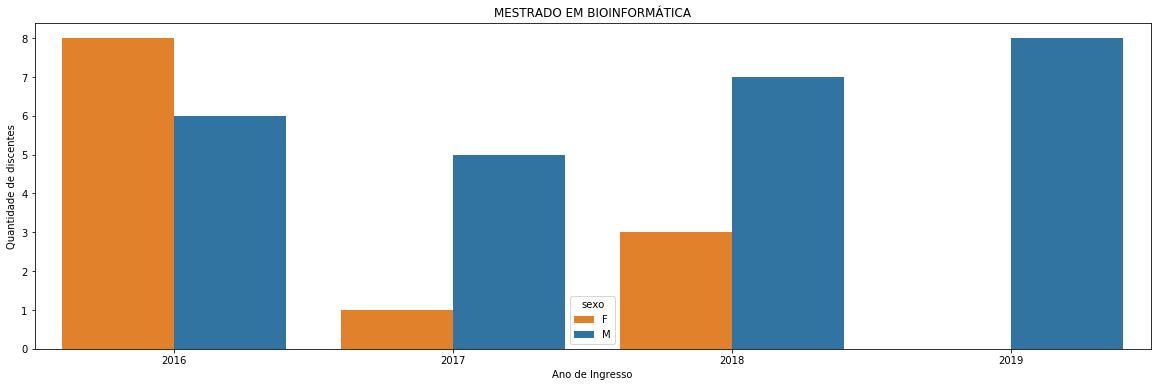

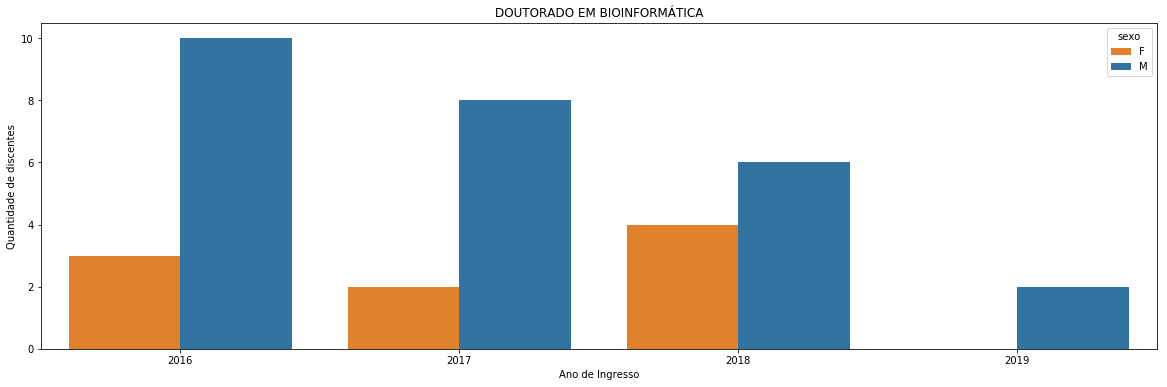

In [109]:
# Definição da paleta de cores a ser utilizada
paleta = {"M":"C0", "F":"C1"}

# Gráfico com todos os cursos de pós-graduação
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Todos os cursos de Pós-Graduação')
ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = pos_graduacao_sexo, palette = paleta)
ax.set_xlabel('Ano de Ingresso')
ax.set_ylabel('Quantidade de discentes')
plt.show()

# Gráfico por curso de pós-graduação
for i in range(8):
  pos = pos_graduacao_sexo.loc[pos_graduacao_sexo['nome_curso'] == lista_pos[i]]
  fig, ax = plt.subplots(figsize=(20,6))
  plt.title(lista_pos[i])
  ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = pos, palette = paleta)
  ax.set_xlabel('Ano de Ingresso')
  ax.set_ylabel('Quantidade de discentes')
  plt.show()

* É perceptível a predominância de ingressantes do sexo masculino em cursos de Pós-Graduação, tanto no gráfico geral, quanto nos gráficos por curso. 
* Apenas o Mestrado Profissional em Inovação em Tecnologias Educacionais possui ingresso maior para o sexo feminino, mas ainda, no ano de 2017, os ingressantes do sexo masculino foram superiores. 
* O Mestrado em Bioinformática foi registrado um ano em que os ingressantes do sexo feminino foi maior que o masculino, o de 2016, os demais os ingressantes do sexo masculino se manteve superior, inclusive, em 2019, não houve ingressantes do sexo feminino.
* Outros cursos que não houve registros de ingressantes do sexo feminino foram: Doutorado em Ciência da Computação (2019), Mestrado Profissional em Engenharia de Software (2014, 2016 e 2019) e o Doutorado em Bioinformática (2019).

#### 2. Análise da diferença de etnias nos cursos de Pós-Graduação da UFRN

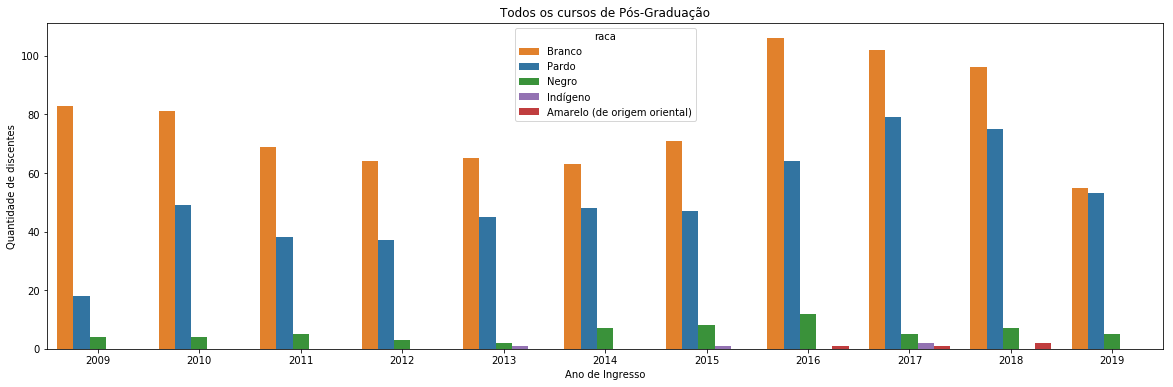

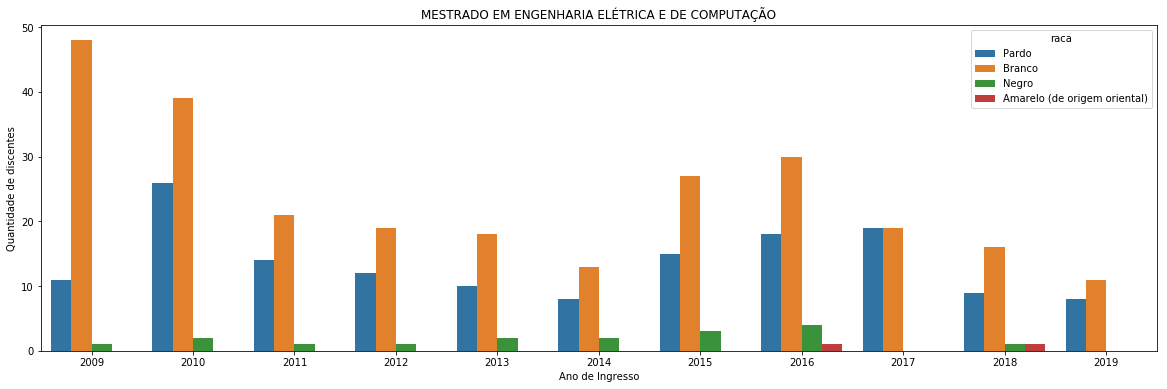

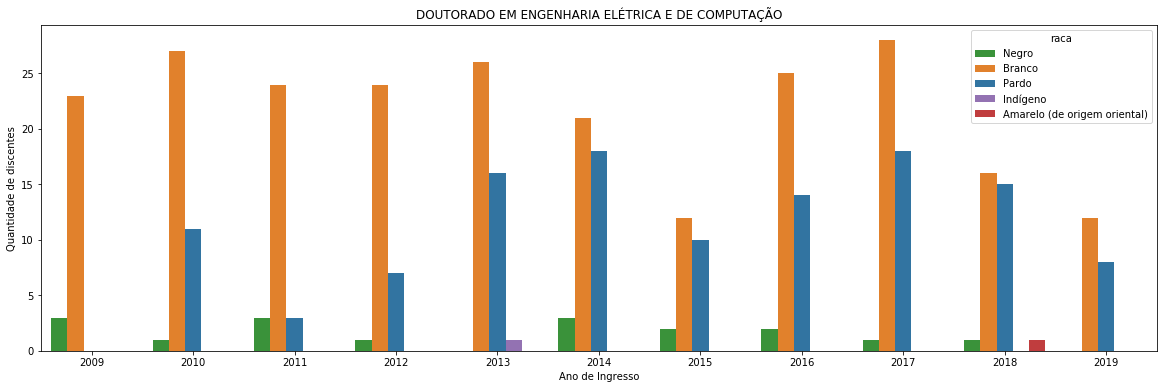

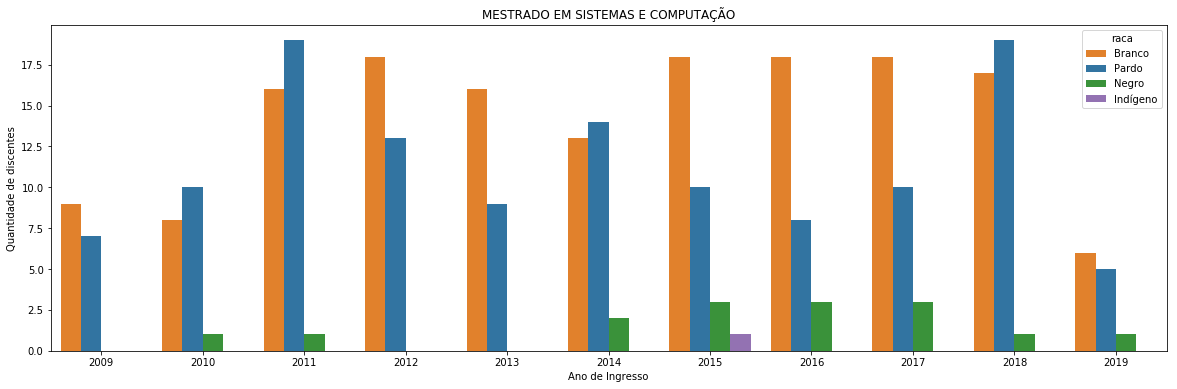

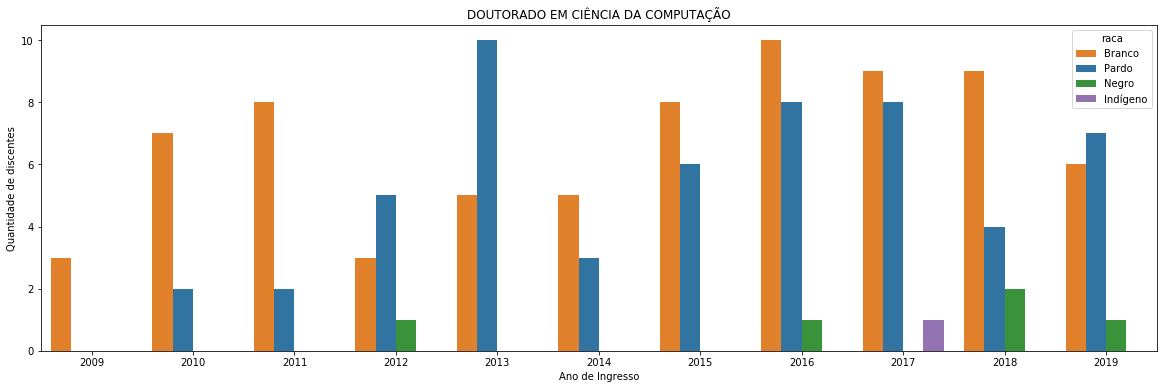

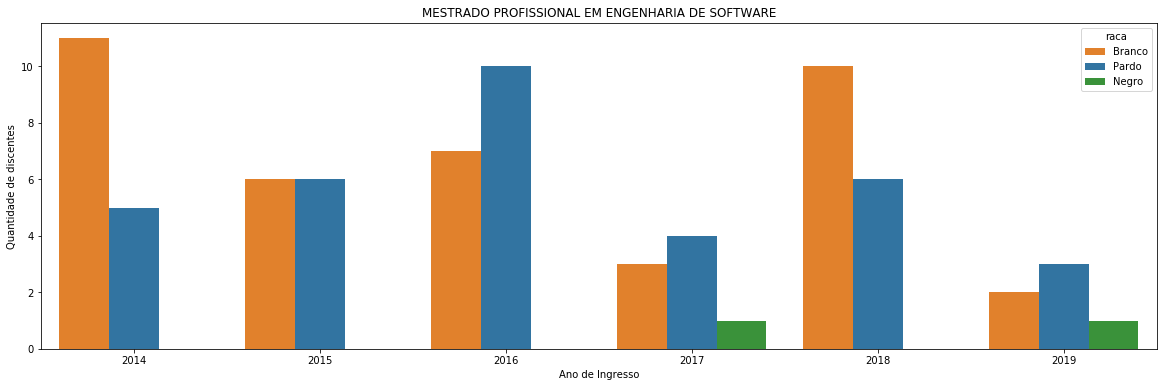

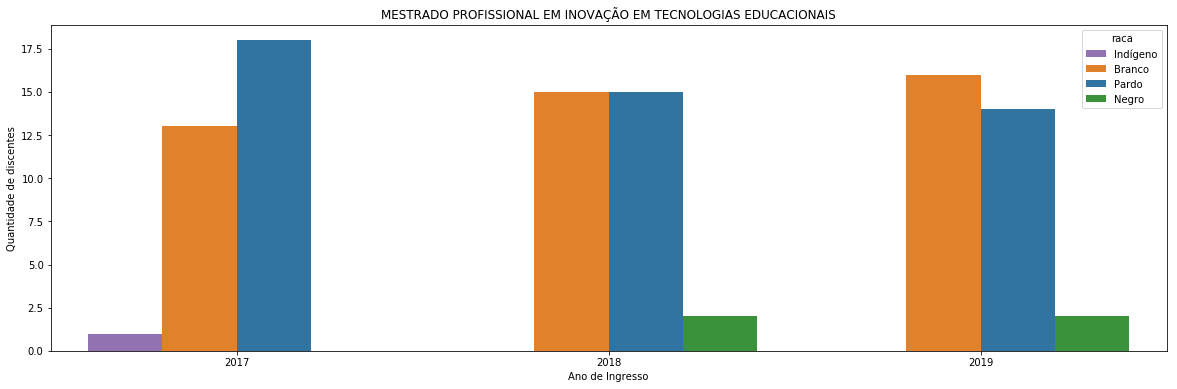

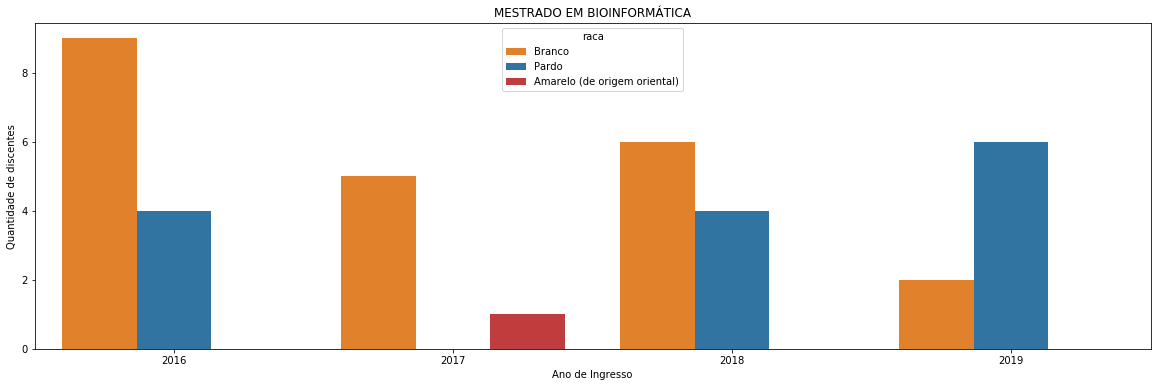

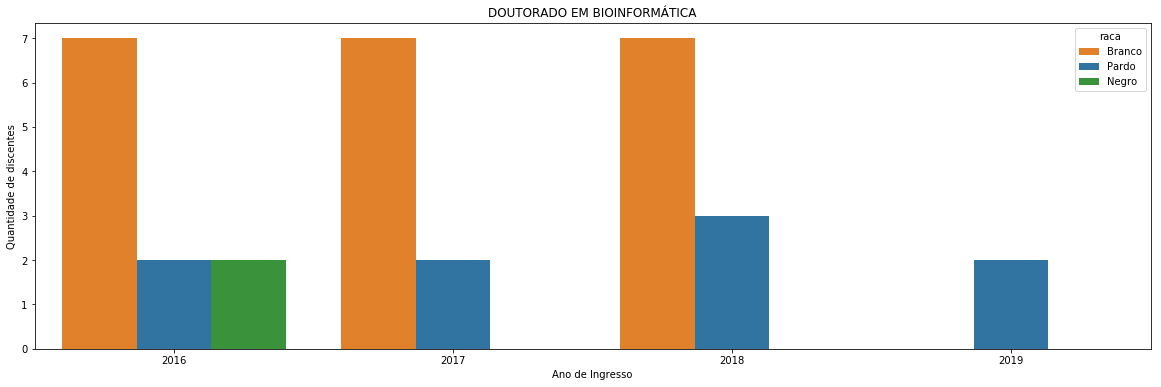

In [110]:
# Definição da paleta de cores a ser utilizada
paleta = {"Pardo":"C0", "Branco":"C1", "Negro":"C2", "Amarelo (de origem oriental)":"C3", "Indígeno":"C4", "Remanescente de quilombo":"C5"}

# Gráfico com todos os cursos de Graduação
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Todos os cursos de Pós-Graduação')
ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = pos_graduacao_raca, palette = paleta)
ax.set_xlabel('Ano de Ingresso')
ax.set_ylabel('Quantidade de discentes')
plt.show()

# Gráfico por curso de Graduação
for i in range(8):
  pos = pos_graduacao_raca.loc[pos_graduacao_raca['nome_curso'] == lista_pos[i]]
  fig, ax = plt.subplots(figsize=(20,6))
  plt.title(lista_pos[i])
  ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = pos, palette = paleta)
  ax.set_xlabel('Ano de Ingresso')
  ax.set_ylabel('Quantidade de discentes')
  plt.show()

* Dado o gráfico geral, imediatamente podemos perceber que não há registros de ingressantes da etnia remanescentes de quilombolas.
* Outro dado importante que podemos perceber pelo gráfico geral é que há predominância de brancos nos cursos de Pós-Graduação.
* As presenças de brancos e pardos foram registradas em todos os cursos.
* A presença de negros não foi registrada apenas no Mestrado em Bioinformática, nos demais cursos, em pelo menos um ano dos anos, houve registro de ingresssantes da etnia.
* A presença de amarelos (de origem oriental) não foi registrada nos seguintes cursos: Mestrado em Sistemas e Computação, Doutorado em Ciência da Computação, Mestrado Profissional em Engenharia de Software, Mestrado Profissional em Inovação em Tecnologias Educacionais e Doutorado em Bioinformática.
* A presença de indígenas não foi registrada nos seguintes cursos: Mestrado em Engenharia Elétrica e de Computação, Mestrado Profissional em Engenharia de Software, Mestrado em Bioinformática e Doutorado em Bioinformática.